In [11]:
import numpy as np
import os
from datetime import datetime
from dateutil.relativedelta import relativedelta
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import pickle

import sys
from pathlib import Path

def find_repo_root(start: Path) -> Path:
    for p in [start] + list(start.parents):
        if (p / '.git').exists():
            return p
    return start

here = Path(__file__).resolve().parent if '__file__' in globals() else Path.cwd()
repo_root = find_repo_root(here)
sys.path.append(str(repo_root / 'common' / 'python' / 'io'))
sys.path.append(str(repo_root / 'projects' / 'matlab2python' / 'shared' / 'python'))
sys.path.append(str(repo_root / 'common' / 'python' / 'plotting'))
sys.path.append('../util/shared/python/')
sys.path.append(str(repo_root / 'projects' / 'discover_JH'))
sys.path.append(str(repo_root / 'projects' / 'utils' / 'scripts'))

EASE_PATH = repo_root / 'common' / 'python' / 'plotting' / 'ease_grids'

from read_GEOSldas          import read_tilecoord, read_obs_param

from mapper_functions import plot_aus_tight_pcm, plot_global_tight_pcm

In [12]:
species_groups = {
    "SMOS": [0, 1, 2, 3],
    "SMAP": [4, 5, 6, 7],
    "ASCAT": [8, 9, 10],
    "MODIS": [11, 12]
}

In [13]:
# Read in the OL data files

stats_file_OL = '/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/land_sweeper/' \
'LS_OLv8_M36/output/SMAP_EASEv2_M36_GLOBAL/figures/temporal_stats_OL_20000601_20240531.nc4'

print('reading stats nc4 file '+stats_file_OL)
stats_OL = {}
with Dataset(stats_file_OL,'r') as nc:
    for key, value in nc.variables.items():
        print(f"Reading variable: {key}")
        stats_OL[key] = value[:].filled(np.nan)

ts_stats_file_OL = '/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/land_sweeper/' \
'LS_OLv8_M36/output/SMAP_EASEv2_M36_GLOBAL/figures/spatial_stats_OL_200006_202405.pkl'

with open(ts_stats_file_OL, 'rb') as f:
    loaded_data = pickle.load(f)
stats_dict_OL = loaded_data
date_vec_OL = loaded_data.get('date_vec', None)  
date_vec = date_vec_OL 

reading stats nc4 file /Users/amfox/Desktop/GEOSldas_diagnostics/test_data/land_sweeper/LS_OLv8_M36/output/SMAP_EASEv2_M36_GLOBAL/figures/temporal_stats_OL_20000601_20240531.nc4
Reading variable: O_mean
Reading variable: O_stdv
Reading variable: F_mean
Reading variable: F_stdv
Reading variable: A_mean
Reading variable: A_stdv
Reading variable: OmF_mean
Reading variable: OmF_stdv
Reading variable: OmA_mean
Reading variable: OmA_stdv
Reading variable: OmF_norm_mean
Reading variable: OmF_norm_stdv
Reading variable: N_data


In [14]:
# Read in the DA data files
stats_file_DA = '/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/M21C_land_sweeper/LS_DAv8_M36_v2/' \
'LS_DAv8_M36/output/SMAP_EASEv2_M36_GLOBAL/figures/temporal_stats_DA_20000601_20240531.nc4'
#stats_file_DA = '/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/land_sweeper/' \
#'LS_DAv8_M36/output/SMAP_EASEv2_M36_GLOBAL/figures/temporal_stats_DA_20000601_20240331.nc4'

print('reading stats nc4 file '+stats_file_DA)
stats_DA = {}
with Dataset(stats_file_DA,'r') as nc:
    for key, value in nc.variables.items():
        stats_DA[key] = value[:].filled(np.nan)

ts_stats_file_DA = '/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/M21C_land_sweeper/LS_DAv8_M36_v2/' \
'LS_DAv8_M36/output/SMAP_EASEv2_M36_GLOBAL/figures/spatial_stats_DA_200006_202405.pkl'
#ts_stats_file_DA = '/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/land_sweeper/' \
#'LS_DAv8_M36/output/SMAP_EASEv2_M36_GLOBAL/figures/spatial_stats_DA_200006_202403.pkl'

with open(ts_stats_file_DA, 'rb') as f:
    loaded_data = pickle.load(f)
stats_dict_DA = loaded_data
date_vec_DA = loaded_data.get('date_vec', None) 

reading stats nc4 file /Users/amfox/Desktop/GEOSldas_diagnostics/test_data/M21C_land_sweeper/LS_DAv8_M36_v2/LS_DAv8_M36/output/SMAP_EASEv2_M36_GLOBAL/figures/temporal_stats_DA_20000601_20240531.nc4


In [15]:
# Sample of final compuation of selected diagnostic metrics for OL
 
Nmin = 20

# Then computer metrics of O-F, O-A, etc. based on above computed
N_data = stats_OL['N_data']
O_mean = stats_OL['O_mean']
A_mean = stats_OL['A_mean']
F_mean = stats_OL['F_mean']
O_stdv = stats_OL['O_stdv']
A_stdv = stats_OL['A_stdv']
F_stdv = stats_OL['F_stdv']
OmF_mean = stats_OL['OmF_mean']
OmF_stdv = stats_OL['OmF_stdv']
OmF_norm_mean = stats_OL['OmF_norm_mean']
OmF_norm_stdv = stats_OL['OmF_norm_stdv']
OmA_mean = stats_OL['OmA_mean']
OmA_stdv = stats_OL['OmA_stdv']
  
# Mask out data points with insufficent observations using the Nmin threshold
# Do NOT apply to N_data
OmF_mean[     N_data < Nmin] = np.nan
OmF_stdv[     N_data < Nmin] = np.nan
OmF_norm_mean[N_data < Nmin] = np.nan
OmF_norm_stdv[N_data < Nmin] = np.nan
OmA_mean[     N_data < Nmin] = np.nan
OmA_stdv[     N_data < Nmin] = np.nan
N_data[       N_data < Nmin] = 0

OmF_mean_OL = OmF_mean
OmF_stdv_OL = OmF_stdv
OmF_norm_mean_OL = OmF_norm_mean
OmF_norm_stdv_OL = OmF_norm_stdv
OmA_mean_OL = OmA_mean
OmA_stdv_OL = OmA_stdv
N_data_OL = N_data

group_metrics_OL = {}

for group, species_indices in species_groups.items():
    group_metrics_OL[group] = {}
    group_N_data = np.nansum(N_data[:, species_indices], axis=1)
    
    group_metrics_OL[group]['OmF_mean'] = np.nansum(OmF_mean[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_OL[group]['OmF_stdv'] = np.nansum(OmF_stdv[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_OL[group]['OmF_norm_mean'] = np.nansum(OmF_norm_mean[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_OL[group]['OmF_norm_stdv'] = np.nansum(OmF_norm_stdv[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_OL[group]['OmA_mean'] = np.nansum(OmA_mean[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_OL[group]['OmA_stdv'] = np.nansum(OmA_stdv[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_OL[group]['Nobs_data'] = group_N_data


/var/folders/p3/6g36x17x60d12xdgb49ryq4r0000gr/T/ipykernel_18242/3977554994.py:44: RuntimeWarning: invalid value encountered in divide
  group_metrics_OL[group]['OmF_mean'] = np.nansum(OmF_mean[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
/var/folders/p3/6g36x17x60d12xdgb49ryq4r0000gr/T/ipykernel_18242/3977554994.py:45: RuntimeWarning: invalid value encountered in divide
  group_metrics_OL[group]['OmF_stdv'] = np.nansum(OmF_stdv[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
/var/folders/p3/6g36x17x60d12xdgb49ryq4r0000gr/T/ipykernel_18242/3977554994.py:46: RuntimeWarning: invalid value encountered in divide
  group_metrics_OL[group]['OmF_norm_mean'] = np.nansum(OmF_norm_mean[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
/var/folders/p3/6g36x17x60d12xdgb49ryq4r0000gr/T/ipykernel_18242/3977554994.py:47: RuntimeWarning: invalid value encountered in divide
  group_metrics_OL[group]['OmF_norm_stdv'] = np.nansum

In [16]:

# Sample of final compuation of selected diagnostic metrics for DA

# Then computer metrics of O-F, O-A, etc. based on above computed
N_data = stats_DA['N_data']
O_mean = stats_DA['O_mean']
A_mean = stats_DA['A_mean']
F_mean = stats_DA['F_mean']
O_stdv = stats_DA['O_stdv']
A_stdv = stats_DA['A_stdv']
F_stdv = stats_DA['F_stdv']
OmF_mean = stats_DA['OmF_mean']
OmF_stdv = stats_DA['OmF_stdv']
OmF_norm_mean = stats_DA['OmF_norm_mean']
OmF_norm_stdv = stats_DA['OmF_norm_stdv']
OmA_mean = stats_DA['OmA_mean']
OmA_stdv = stats_DA['OmA_stdv']

# Mask out data points with insufficent observations using the Nmin threshold
# Do NOT apply to N_data
OmF_mean[     N_data < Nmin] = np.nan
OmF_stdv[     N_data < Nmin] = np.nan
OmF_norm_mean[N_data < Nmin] = np.nan
OmF_norm_stdv[N_data < Nmin] = np.nan
OmA_mean[     N_data < Nmin] = np.nan
OmA_stdv[     N_data < Nmin] = np.nan
N_data[       N_data < Nmin] = 0
OmF_mean_DA = OmF_mean
OmF_stdv_DA = OmF_stdv
OmF_norm_mean_DA = OmF_norm_mean
OmF_norm_stdv_DA = OmF_norm_stdv
OmA_mean_DA = OmA_mean
OmA_stdv_DA = OmA_stdv
N_data_DA = N_data

group_metrics_DA = {}

for group, species_indices in species_groups.items():
    group_metrics_DA[group] = {}
    group_N_data = np.nansum(N_data[:, species_indices], axis=1)
    
    group_metrics_DA[group]['OmF_mean'] = np.nansum(OmF_mean[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_DA[group]['OmF_stdv'] = np.nansum(OmF_stdv[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_DA[group]['OmF_norm_mean'] = np.nansum(OmF_norm_mean[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_DA[group]['OmF_norm_stdv'] = np.nansum(OmF_norm_stdv[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_DA[group]['OmA_mean'] = np.nansum(OmA_mean[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_DA[group]['OmA_stdv'] = np.nansum(OmA_stdv[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_DA[group]['Nobs_data'] = group_N_data


/var/folders/p3/6g36x17x60d12xdgb49ryq4r0000gr/T/ipykernel_18242/4095136516.py:41: RuntimeWarning: invalid value encountered in divide
  group_metrics_DA[group]['OmF_mean'] = np.nansum(OmF_mean[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
/var/folders/p3/6g36x17x60d12xdgb49ryq4r0000gr/T/ipykernel_18242/4095136516.py:42: RuntimeWarning: invalid value encountered in divide
  group_metrics_DA[group]['OmF_stdv'] = np.nansum(OmF_stdv[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
/var/folders/p3/6g36x17x60d12xdgb49ryq4r0000gr/T/ipykernel_18242/4095136516.py:43: RuntimeWarning: invalid value encountered in divide
  group_metrics_DA[group]['OmF_norm_mean'] = np.nansum(OmF_norm_mean[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
/var/folders/p3/6g36x17x60d12xdgb49ryq4r0000gr/T/ipykernel_18242/4095136516.py:44: RuntimeWarning: invalid value encountered in divide
  group_metrics_DA[group]['OmF_norm_stdv'] = np.nansum

In [17]:
ftc = '/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/land_sweeper/' \
      'LS_OLv8_M36/output/SMAP_EASEv2_M36_GLOBAL/rc_out/LS_OLv8_M36.ldas_tilecoord.bin'
tc = read_tilecoord(ftc)
n_tile = tc['N_tile']
lat = tc['com_lat']
lon = tc['com_lon']

map_array = np.empty([n_tile, 3])
map_array.fill(np.nan)
map_array[:, 1] = lon
map_array[:, 2] = lat

reading from /Users/amfox/Desktop/GEOSldas_diagnostics/test_data/land_sweeper/LS_OLv8_M36/output/SMAP_EASEv2_M36_GLOBAL/rc_out/LS_OLv8_M36.ldas_tilecoord.bin
done reading file


In [18]:
for group in species_groups.keys():

    map_array[:, 0] = group_metrics_DA[group]['Nobs_data']

    maxval = np.nanmax(map_array[:, 0])
    minval = np.nanmin(map_array[:, 0])


    # Plot group map
    plot_global_tight_pcm(
        map_array, 
        False, 
        True, 
        f'{group} Ndata: LS_DAv8_M36_200006_202404 \n (Max: {maxval:.3g} Min: {minval:.3g})', 
        'Cnt', 
    )

# ASCAT = 6121
# SMOS = 5047
# SMAP = 3287

for group in species_groups.keys():

    map_array[:, 0] = group_metrics_DA[group]['Nobs_data']

    if group == 'ASCAT':
        map_array[:, 0] = map_array[:, 0] / 6121
    elif group == 'SMOS':
        map_array[:, 0] = map_array[:, 0] / 5047
    elif group == 'SMAP':
        map_array[:, 0] = map_array[:, 0] / 3287
    elif group == 'MODIS':
        map_array[:, 0] = map_array[:, 0] / 8700    

    maxval = np.nanmax(map_array[:, 0])
    minval = np.nanmin(map_array[:, 0])


    # Plot group map
    plot_global_tight_pcm(
        map_array, 
        False, 
        True, 
        f'{group} Obs per day: LS_DAv8_M36_200006_202405 \n (Max: {maxval:.3g} Min: {minval:.3g})', 
        'Obs per day', 
    )

FileNotFoundError: [Errno 2] No such file or directory: '../test_data/EASE2_M36km.lats.964x406x1.double'

In [19]:
def convert_stats_dict_to_arrays(stats_dict):
    """Convert dictionary of lists to numpy arrays"""
    array_dict = {}
    
    for key in stats_dict.keys():
        # Convert list to array and reshape
        array_dict[key] = np.array(stats_dict[key])
        
        # Check if we need to handle missing values (-- in data)
        if isinstance(array_dict[key][0], (list, np.ndarray)):
            # Replace '--' with np.nan
            temp_array = []
            for row in array_dict[key]:
                cleaned_row = [np.nan if x == '--' else float(x) for x in row]
                temp_array.append(cleaned_row)
            array_dict[key] = np.array(temp_array)
    
    return array_dict

# Convert dictionary
stats_dict_DA_arrays = convert_stats_dict_to_arrays(stats_dict_DA)
stats_dict_OL_arrays = convert_stats_dict_to_arrays(stats_dict_OL)

# Convert date vector to datetime objects
date_vec_DA = [datetime.strptime(date, '%Y%m') for date in date_vec_DA]
date_vec_OL = [datetime.strptime(date, '%Y%m') for date in date_vec_OL]

# Print first few dates to verify
print("Sample dates:", date_vec_DA[:3])
# Print the last few dates to verify
print("Sample dates:", date_vec_DA[-3:])

Sample dates: [datetime.datetime(2000, 6, 1, 0, 0), datetime.datetime(2000, 7, 1, 0, 0), datetime.datetime(2000, 8, 1, 0, 0)]
Sample dates: [datetime.datetime(2024, 3, 1, 0, 0), datetime.datetime(2024, 4, 1, 0, 0), datetime.datetime(2024, 5, 1, 0, 0)]


In [20]:
def calculate_weighted_group_stats(stats_dict, species_groups):
    """Calculate weighted statistics for each group"""
    
    n_times = len(stats_dict['OmF_mean'])
    stats = ['O_mean','F_mean','OmF_mean', 'OmF_stdv', 'OmA_mean', 'OmA_stdv']
    
    # Initialize output dictionary
    group_stats = {}
    for group in species_groups.keys():
        group_stats[group] = {stat: np.zeros(n_times) for stat in stats}
        group_stats[group]['N_data'] = np.zeros(n_times)
    
    # Calculate weighted stats for each timestep
    for t in range(n_times):
        for group, indices in species_groups.items():
            # Get weights for this group/time
            weights = stats_dict['N_data'][t, indices]
            total_weight = np.sum(weights)
            
            if total_weight > 0:
                # Calculate weighted statistics
                for stat in stats:
                    values = stats_dict[stat][t, indices]
                    group_stats[group][stat][t] = np.average(values, weights=weights)
                group_stats[group]['N_data'][t] = total_weight
            else:
                # Set to NaN if no observations
                for stat in stats:
                    group_stats[group][stat][t] = np.nan
                    
    return group_stats

# Calculate group means
group_ts_DA = calculate_weighted_group_stats(stats_dict_DA_arrays, species_groups)
group_ts_OL = calculate_weighted_group_stats(stats_dict_OL_arrays, species_groups)

In [21]:
print("length of date_vec_DA", len(date_vec_DA))
print("length of date_vec", len(date_vec))

length of date_vec_DA 288
length of date_vec 288


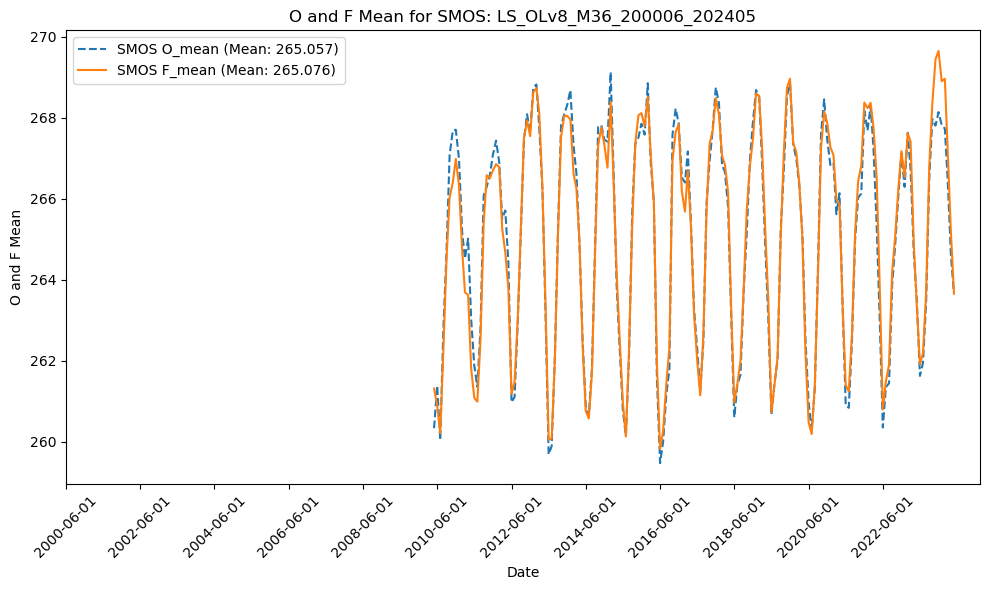

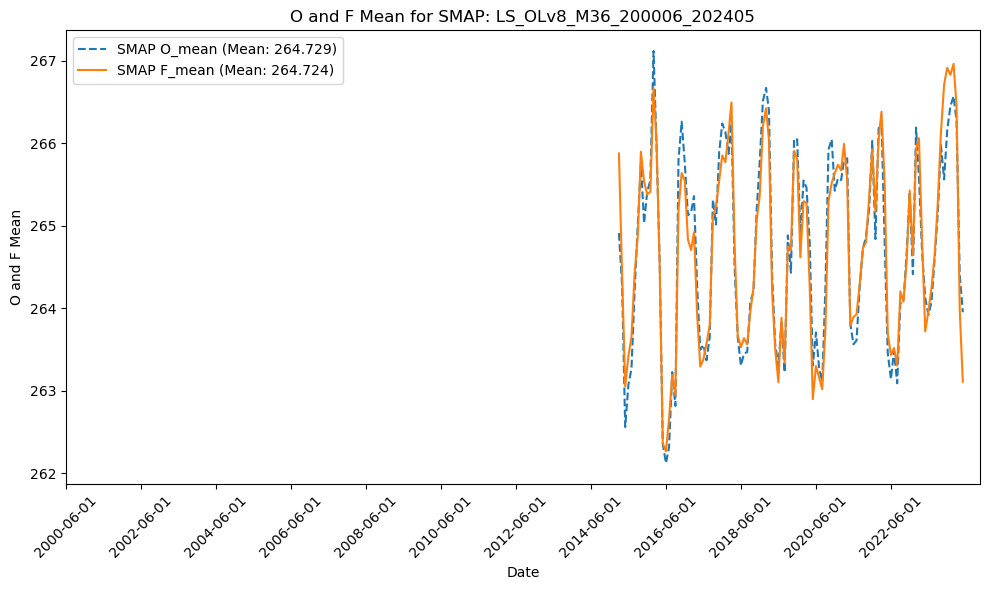

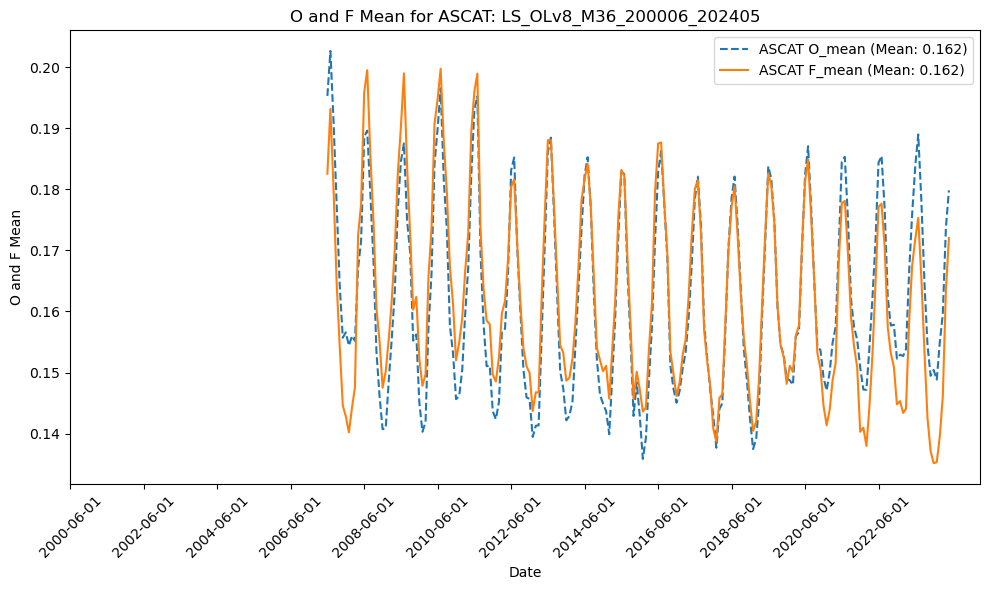

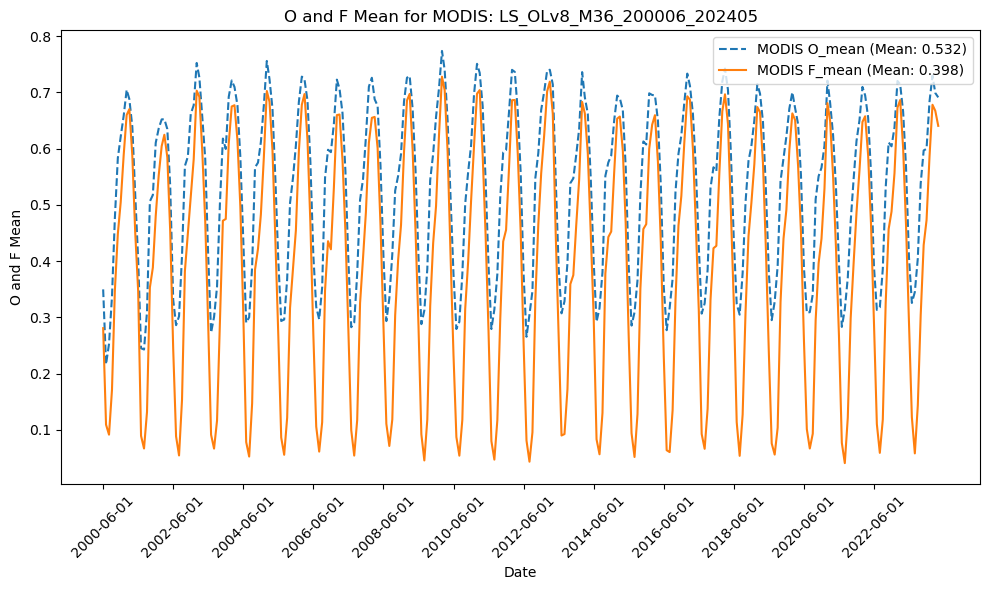

In [22]:
# Create individual plots for each species
for group in species_groups.keys():
    plt.figure(figsize=(10, 6))
    
    # Plot OmF_mean for OL and DA
    mean_O = np.nanmean(group_ts_OL[group]['O_mean'])
    mean_F = np.nanmean(group_ts_OL[group]['F_mean'])
    
    plt.plot(date_vec_OL, group_ts_OL[group]['O_mean'], '--', label=f'{group} O_mean (Mean: {mean_O:.3f})')
    plt.plot(date_vec_OL, group_ts_OL[group]['F_mean'], '-', label=f'{group} F_mean (Mean: {mean_F:.3f})')
    
    # Add black dotted line for Y = 0
    # plt.axhline(y=0, color='black', linestyle=':', linewidth=1)
    
    # Customize plot
    plt.title(f'O and F Mean for {group}: LS_OLv8_M36_200006_202405')
    plt.xlabel('Date')
    plt.ylabel('O and F Mean')
    plt.legend()
    
    # Set x-ticks to every 6 months
    # Set x-ticks using datetime array
    plt.xticks(date_vec_DA[::24], rotation=45)
    
    plt.tight_layout()
    plt.show()

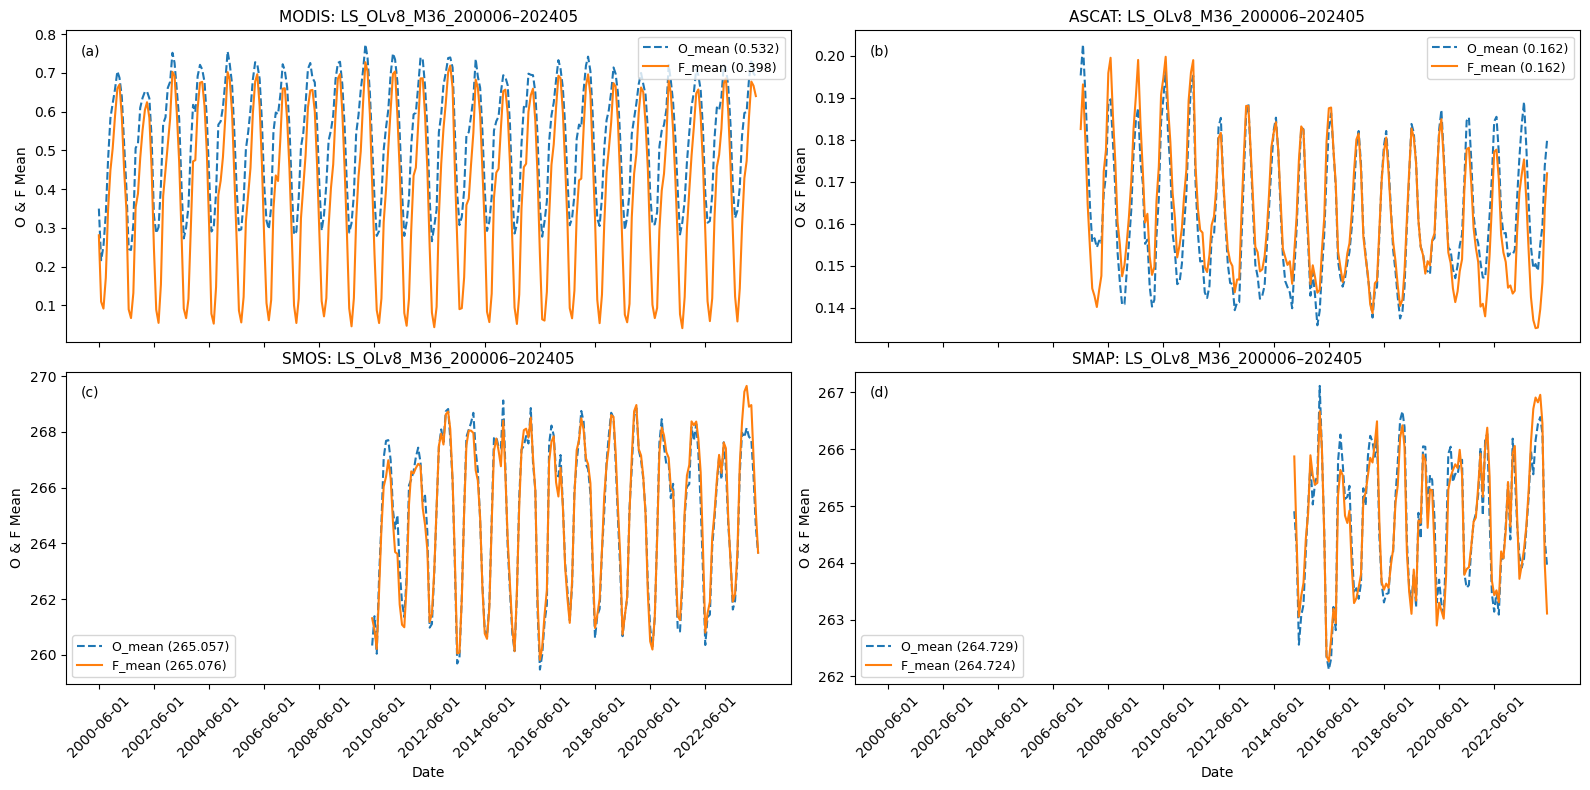

In [23]:
targets = ["MODIS", "ASCAT", "SMOS", "SMAP"]
panel_labels = ["(a)", "(b)", "(c)", "(d)"]

fig, axes = plt.subplots(2, 2, figsize=(16, 8), sharex=True)
axes = axes.flatten()

for ax, group, label in zip(axes, targets, panel_labels):
    o_mean = group_ts_OL[group]["O_mean"]
    f_mean = group_ts_OL[group]["F_mean"]
    mean_o = np.nanmean(o_mean)
    mean_f = np.nanmean(f_mean)

    ax.plot(date_vec_OL, o_mean, "--", label=f"O_mean ({mean_o:.3f})")
    ax.plot(date_vec_OL, f_mean, "-", label=f"F_mean ({mean_f:.3f})")
    ax.set_title(f"{group}: LS_OLv8_M36_200006–202405", fontsize=11)
    ax.set_ylabel("O & F Mean")
    ax.text(0.02, 0.92, label, transform=ax.transAxes)

    if ax in axes[:2]:  # top row
        ax.tick_params(labelbottom=False)
    else:
        ax.set_xlabel("Date")
        ax.set_xticks(date_vec_OL[::24])
        ax.tick_params(axis="x", rotation=45)

    ax.legend(fontsize=9)

plt.tight_layout(h_pad=0.3, w_pad=0.25)
plt.show()

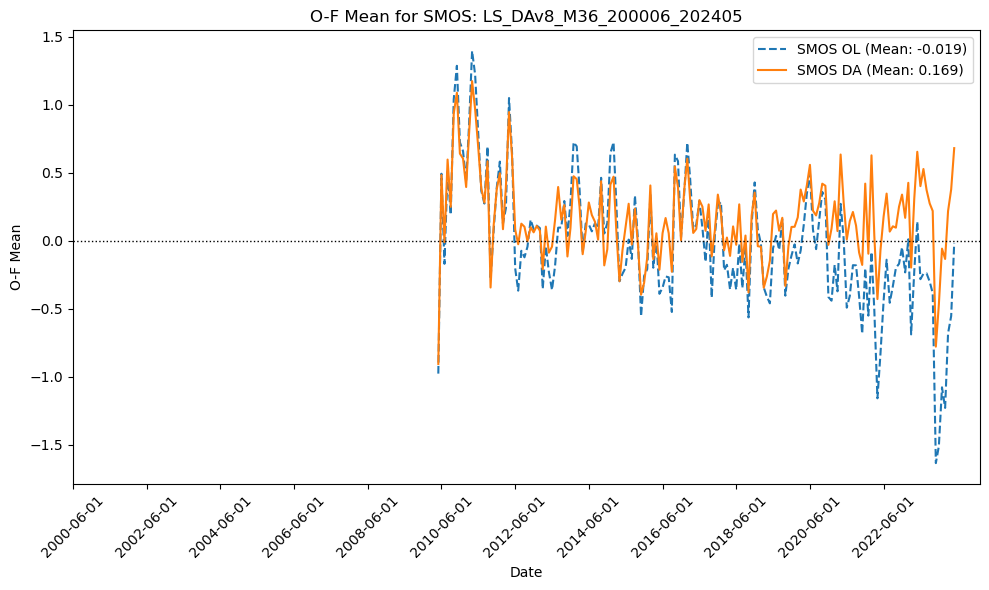

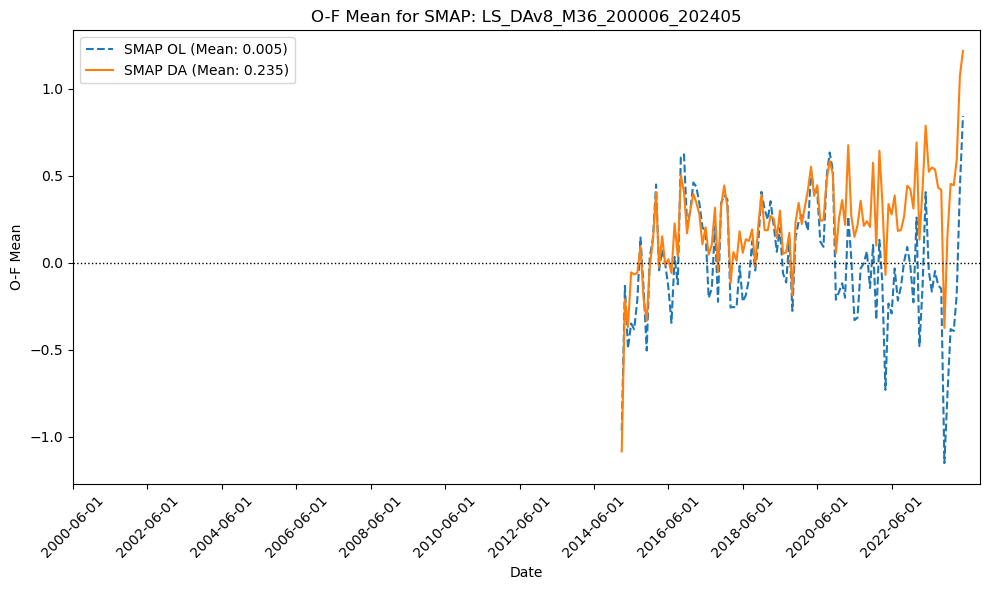

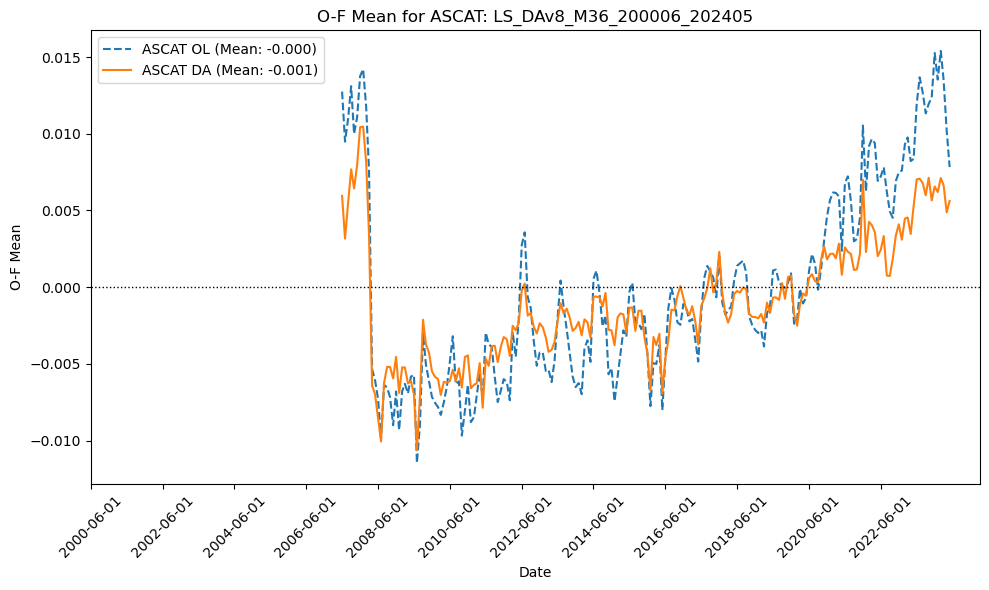

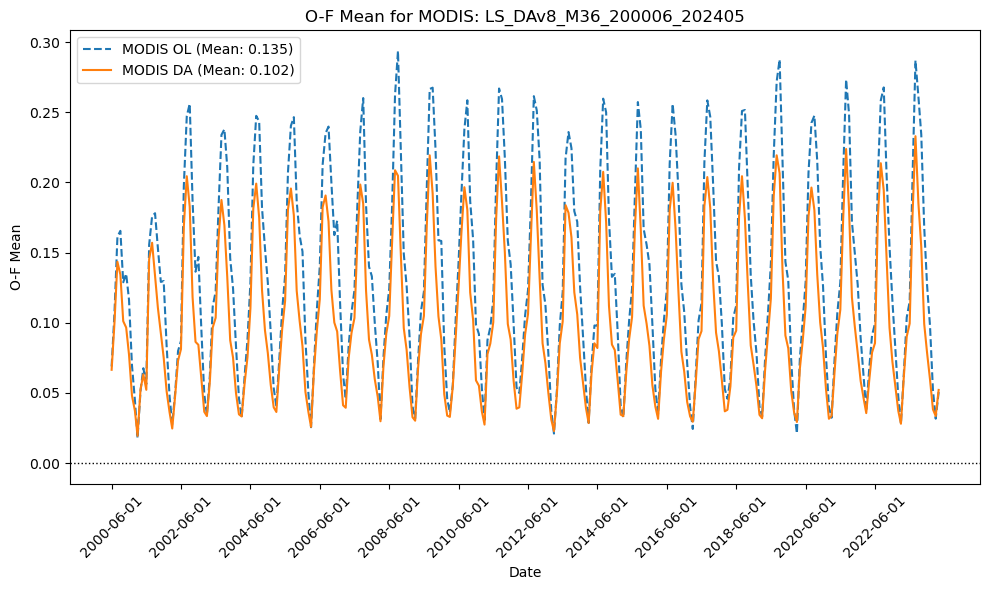

In [24]:
# Create individual plots for each species
for group in species_groups.keys():
    plt.figure(figsize=(10, 6))
    
    # Plot OmF_mean for OL and DA
    mean_OL = np.nanmean(group_ts_OL[group]['OmF_mean'])
    mean_DA = np.nanmean(group_ts_DA[group]['OmF_mean'])
    
    plt.plot(date_vec_OL, group_ts_OL[group]['OmF_mean'], '--', label=f'{group} OL (Mean: {mean_OL:.3f})')
    plt.plot(date_vec_DA, group_ts_DA[group]['OmF_mean'], '-', label=f'{group} DA (Mean: {mean_DA:.3f})')
    
    # Add black dotted line for Y = 0
    plt.axhline(y=0, color='black', linestyle=':', linewidth=1)
    
    # Customize plot
    plt.title(f'O-F Mean for {group}: LS_DAv8_M36_200006_202405')
    plt.xlabel('Date')
    plt.ylabel('O-F Mean')
    plt.legend()
    
    # Set x-ticks to every 24 months
    # Set x-ticks using datetime array
    plt.xticks(date_vec_DA[::24], rotation=45)
    
    plt.tight_layout()
    plt.show()

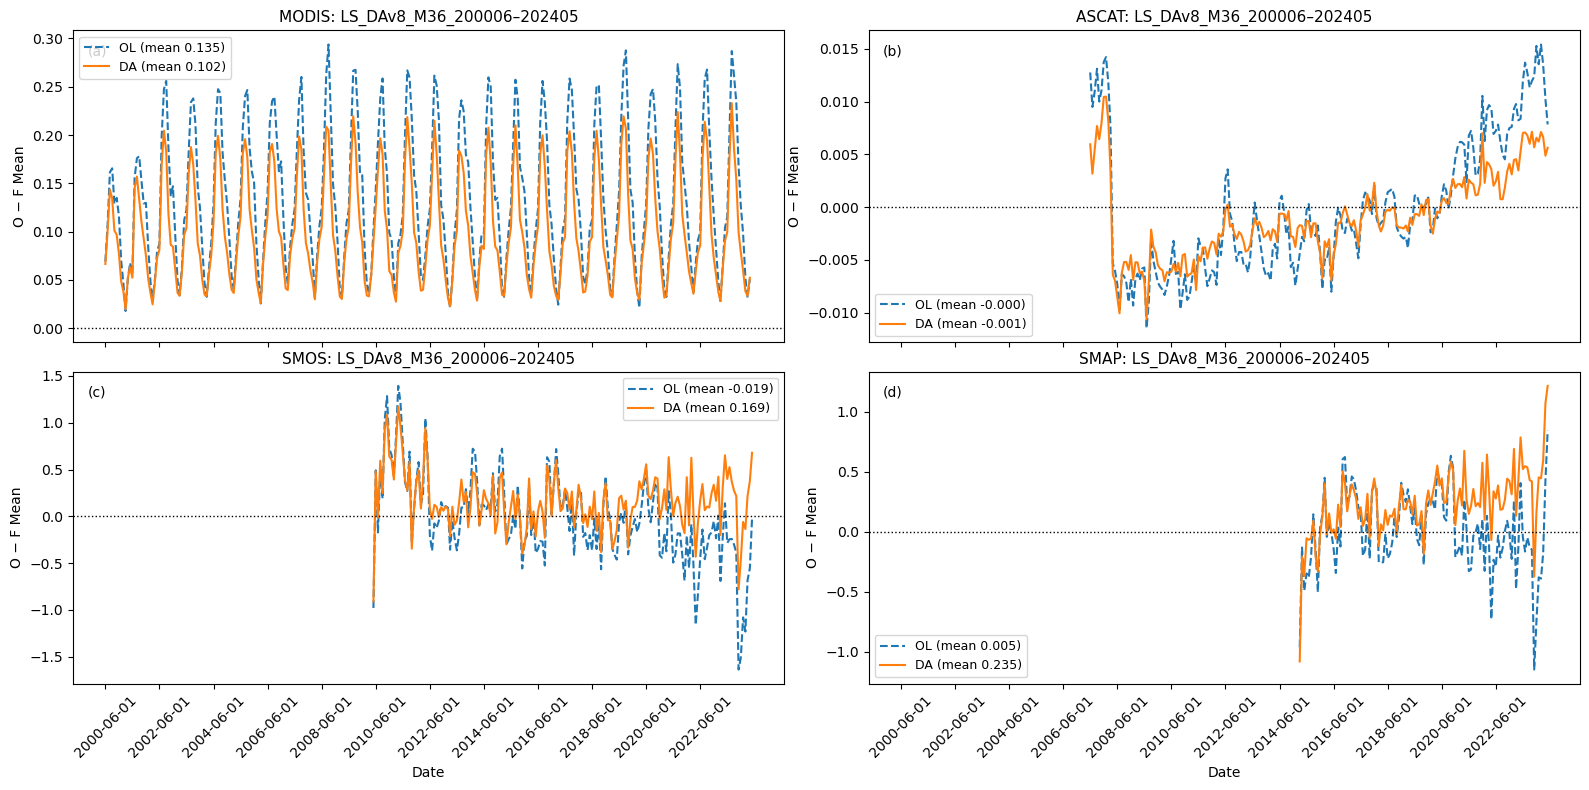

In [25]:
targets = ["MODIS", "ASCAT", "SMOS", "SMAP"]
panel_labels = ["(a)", "(b)", "(c)", "(d)"]

fig, axes = plt.subplots(2, 2, figsize=(16, 8), sharex=True)
axes = axes.flatten()

for ax, group, label in zip(axes, targets, panel_labels):
    ol_series = group_ts_OL[group]["OmF_mean"]
    da_series = group_ts_DA[group]["OmF_mean"]
    mean_ol = np.nanmean(ol_series)
    mean_da = np.nanmean(da_series)

    ax.plot(date_vec_OL, ol_series, "--", label=f"OL (mean {mean_ol:.3f})")
    ax.plot(date_vec_DA, da_series, "-", label=f"DA (mean {mean_da:.3f})")
    ax.axhline(0, color="black", linestyle=":", linewidth=1)

    ax.set_title(f"{group}: LS_DAv8_M36_200006–202405", fontsize=11)
    ax.set_ylabel("O − F Mean")
    ax.text(0.02, 0.92, label, transform=ax.transAxes)

    if ax in axes[:2]:
        ax.tick_params(labelbottom=False)
    else:
        ax.set_xlabel("Date")
        ax.set_xticks(date_vec_DA[::24])
        ax.tick_params(axis="x", rotation=45)

    ax.legend(fontsize=9)

plt.tight_layout(h_pad=0.3, w_pad=0.25)
plt.show()

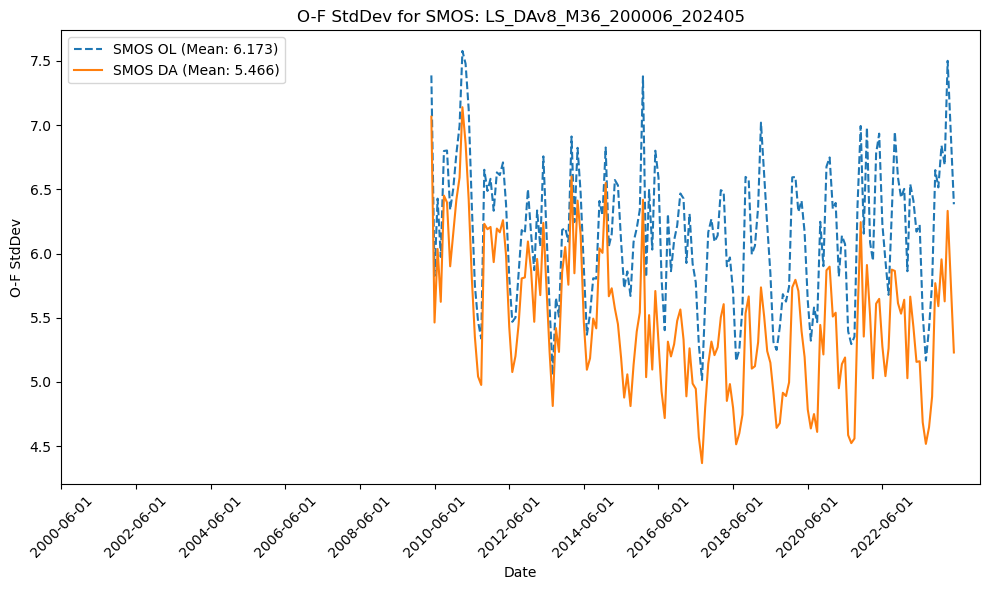

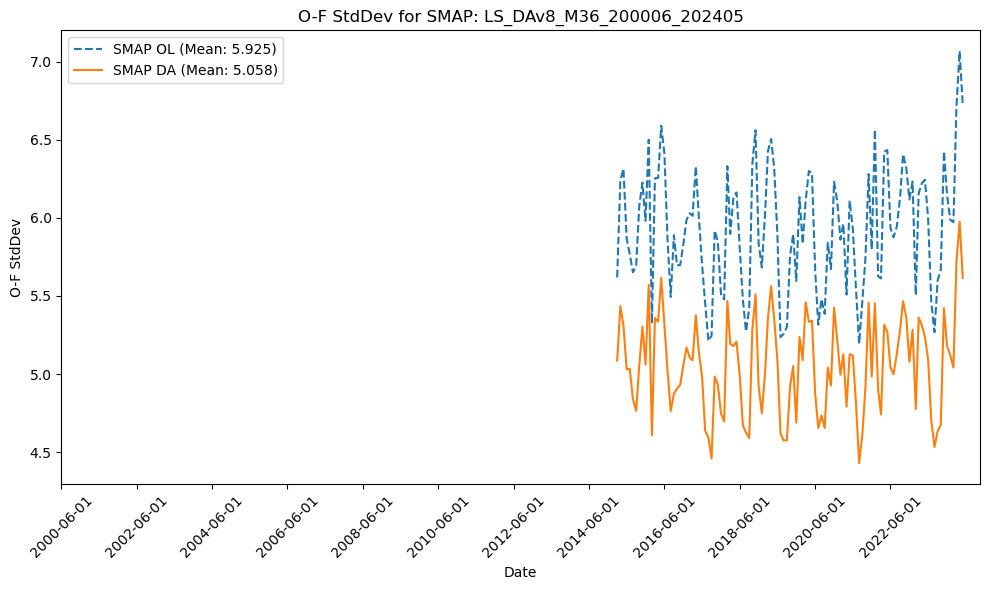

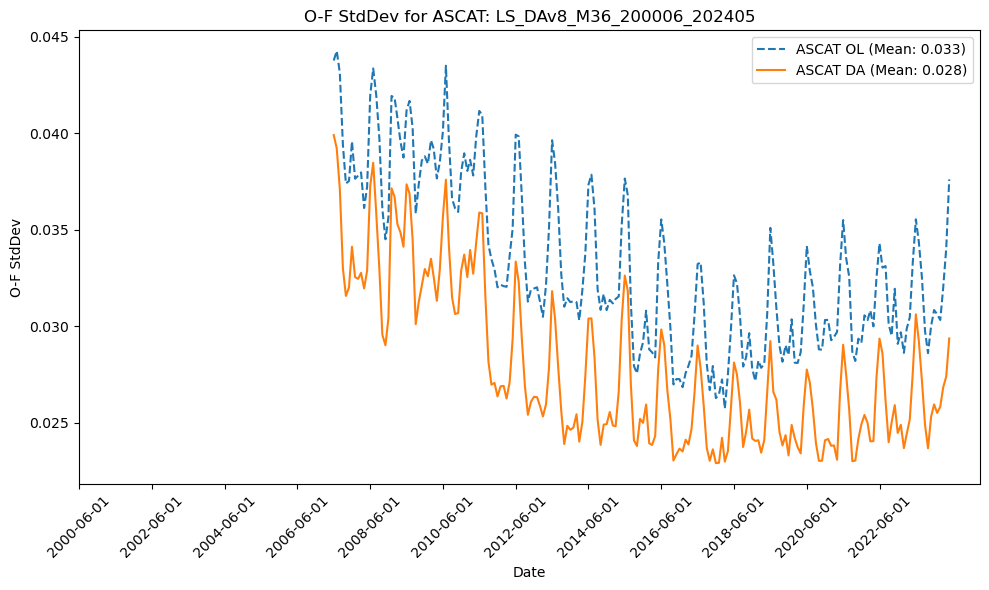

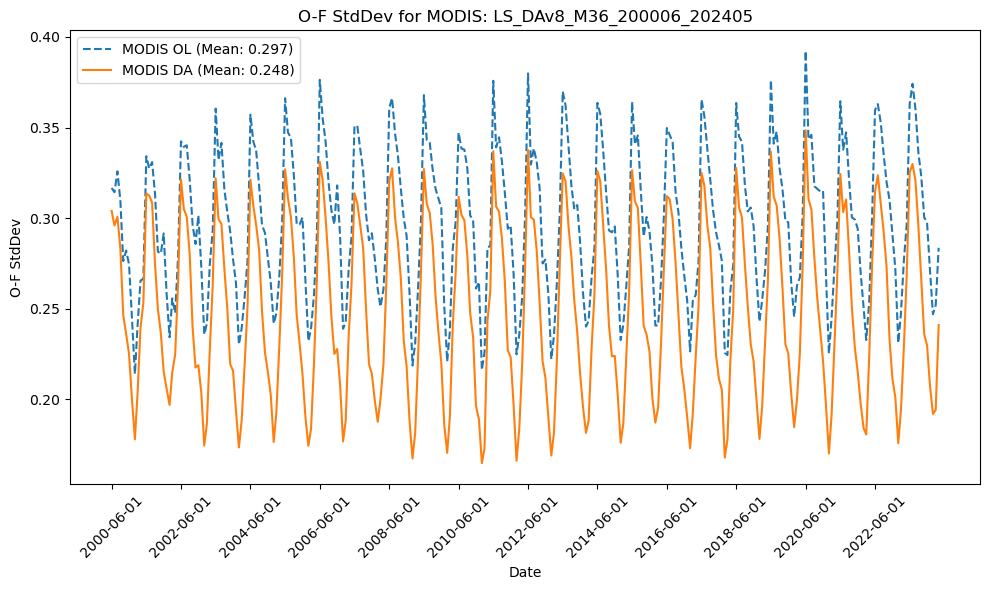

In [26]:
# Create individual plots for each species
for group in species_groups.keys():
    plt.figure(figsize=(10, 6))
    
    # Plot OmF_mean for OL and DA
    mean_OL = np.nanmean(group_ts_OL[group]['OmF_stdv'])
    mean_DA = np.nanmean(group_ts_DA[group]['OmF_stdv'])
    
    plt.plot(date_vec_DA, group_ts_OL[group]['OmF_stdv'], '--', label=f'{group} OL (Mean: {mean_OL:.3f})')
    plt.plot(date_vec_DA, group_ts_DA[group]['OmF_stdv'], '-', label=f'{group} DA (Mean: {mean_DA:.3f})')
    
    # Customize plot
    plt.title(f'O-F StdDev for {group}: LS_DAv8_M36_200006_202405')
    plt.xlabel('Date')
    plt.ylabel('O-F StdDev')
    plt.legend()
    
    # Set y-axis minimum to zero
    # plt.ylim(bottom=0)
    
    # Set x-ticks using datetime array
    plt.xticks(date_vec_DA[::24], rotation=45)
    
    plt.tight_layout()
    plt.show()

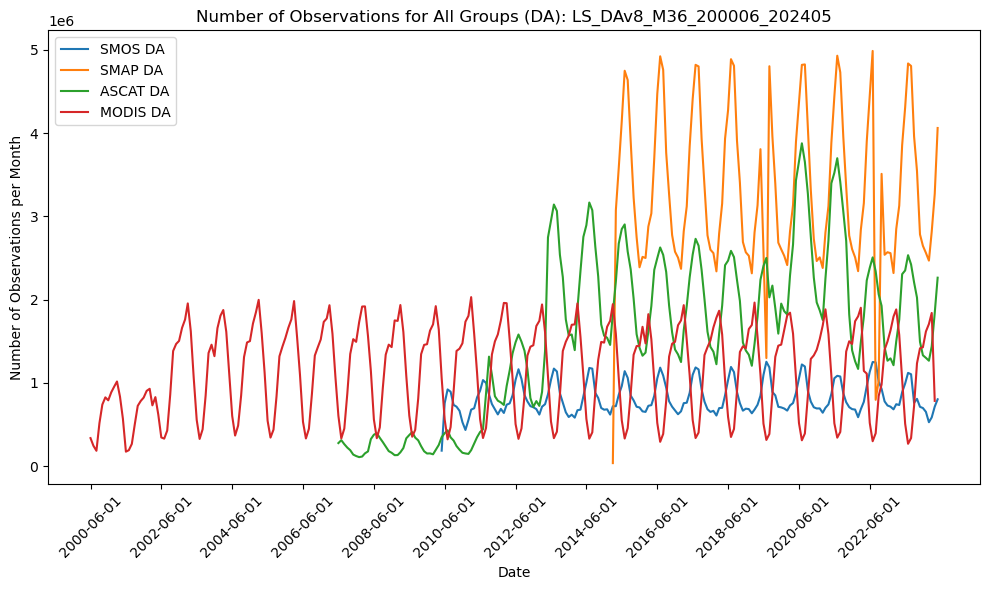

In [27]:
# Replace zeros with NaNs in the data
for group in species_groups.keys():
    group_ts_DA[group]['N_data'] = np.where(group_ts_DA[group]['N_data'] == 0, np.nan, group_ts_DA[group]['N_data'])

# Plot time series of the number of observations for each group
plt.figure(figsize=(10, 6))

# Plot Nobs_data for DA for all groups on one figure
for group in species_groups.keys():
    plt.plot(date_vec_DA, group_ts_DA[group]['N_data'], label=f'{group} DA')

# Customize plot
plt.title('Number of Observations for All Groups (DA): LS_DAv8_M36_200006_202405')
plt.xlabel('Date')
plt.ylabel('Number of Observations per Month')
plt.legend()

# Set x-ticks using datetime array
plt.xticks(date_vec_DA[::24], rotation=45)

plt.tight_layout()
plt.show()


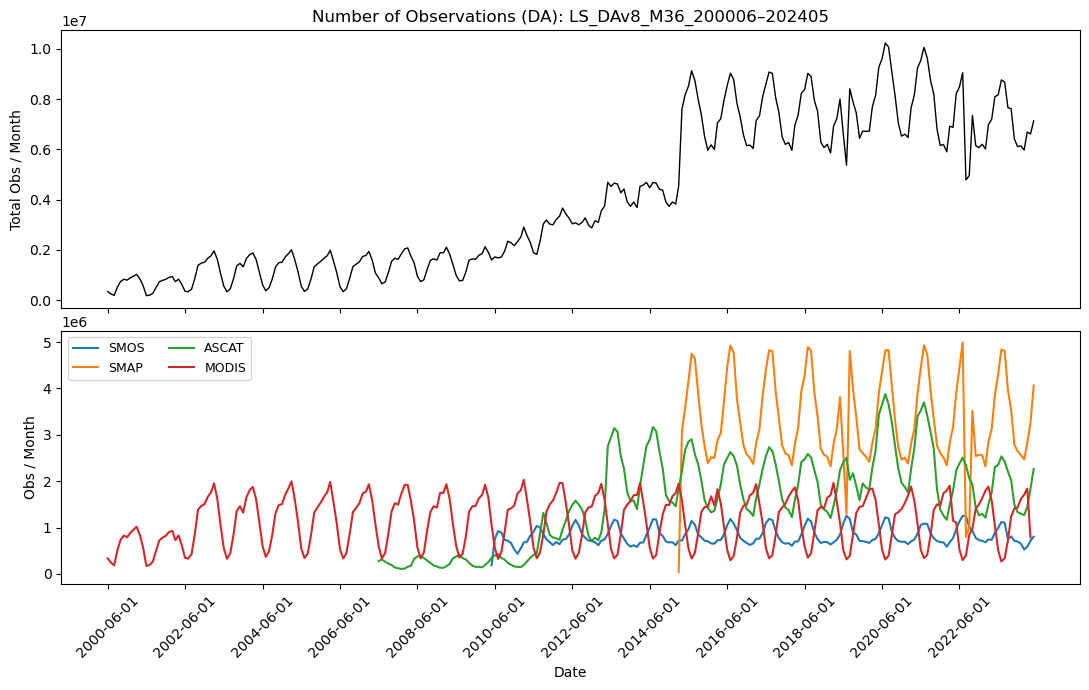

In [28]:
# Replace zeros with NaNs
for group in species_groups:
    data = group_ts_DA[group]['N_data']
    group_ts_DA[group]['N_data'] = np.where(data == 0, np.nan, data)

# Stack all groups (rows = groups, cols = months)
group_stack = np.vstack([group_ts_DA[g]['N_data'] for g in species_groups])

# Total obs per month (ignores NaNs)
total_obs = np.nansum(group_stack, axis=0)

fig, (ax_top, ax_bottom) = plt.subplots(
    2, 1, figsize=(11, 7), sharex=True, height_ratios=[1.1, 1]
)

# Top panel: total obs / month
ax_top.plot(date_vec_DA, total_obs, color='k', lw=1)
ax_top.set_ylabel('Total Obs / Month')
ax_top.set_title('Number of Observations (DA): LS_DAv8_M36_200006–202405')
ax_top.tick_params(labelbottom=False)  # suppress x ticklabels here

# Bottom panel: per-group series
for group in species_groups:
    ax_bottom.plot(date_vec_DA, group_ts_DA[group]['N_data'], label=group)

ax_bottom.set_ylabel('Obs / Month')
ax_bottom.set_xlabel('Date')
ax_bottom.legend(ncol=2, fontsize=9)

# x ticks every ~24 months (adjust as you like)
ax_bottom.set_xticks(date_vec_DA[::24])
ax_bottom.tick_params(axis='x', rotation=45)

plt.tight_layout(h_pad=0.2)
plt.show()

In [ ]:
print(len(date_vec_DA))
print(len(group_ts_DA['SMAP']['N_data']))
print(len(group_ts_OL[group]['OmF_stdv']))
print(len(group_ts_DA[group]['OmF_stdv']))


group = 'MODIS'
# Print the last 5 value of these arrays to verify
print("Last 5 dates:", date_vec_DA[-5:])
print("Last 5 OL OmF_stdv:", group_ts_OL[group]['OmF_stdv'][-5:])
print("Last 5 DA OmF_stdv:", group_ts_DA[group]['OmF_stdv'][-5:])
print("Last 5 DA N_data:", group_ts_DA[group]['N_data'][-5:])

In [ ]:
# Create individual plots for each species group
for group in species_groups.keys():
    plt.figure(figsize=(10, 6))
    
    # Calculate normalized percent difference
    norm_percent_diff = np.divide(
        (group_ts_DA[group]['OmF_stdv'] - group_ts_OL[group]['OmF_stdv']),
        group_ts_OL[group]['OmF_stdv'],
        out=np.full_like(group_ts_OL[group]['OmF_stdv'], np.nan, dtype=float),
        where=group_ts_OL[group]['OmF_stdv'] != 0
    ) * 100
    
    mean_diff = np.nanmean(norm_percent_diff)
    
    # Plot normalized percent difference
    plt.plot(date_vec_DA, norm_percent_diff, label=f'{group} (Mean: {mean_diff:.3f}%)')
    
    # Customize plot
    plt.title(f'Normalized Percent Difference (OL - DA) for {group} OmF Stdv: LS_DAv8_M36_200006_202405')
    plt.xlabel('Date')
    plt.ylabel('Normalized Percent Difference (%)')
    plt.axhline(y=0, color='black', linestyle=':', linewidth=1)  # Add black dotted line for Y = 0
    plt.legend()
    
    # Set x-ticks using datetime array
    plt.xticks(date_vec_DA[::24], rotation=45)
    
    plt.tight_layout()
    plt.show()


In [ ]:
# Plot the first three groups on the same plot
plt.figure(figsize=(10, 6))

# Define the first three groups
groups_to_plot = list(species_groups.keys())[:3]

# Plot normalized percent difference for each group
for group in groups_to_plot:
    norm_percent_diff = np.divide(
        (group_ts_DA[group]['OmF_stdv'] - group_ts_OL[group]['OmF_stdv']),
        group_ts_OL[group]['OmF_stdv'],
        out=np.full_like(group_ts_OL[group]['OmF_stdv'], np.nan, dtype=float),
        where=group_ts_OL[group]['OmF_stdv'] != 0
    ) * 100
    
    mean_diff = np.nanmean(norm_percent_diff)
    plt.plot(date_vec_DA, norm_percent_diff, label=f'{group} (Mean: {mean_diff:.3f}%)')

# Customize plot
plt.title('Normalized Percent Difference (OL - DA): LS_DAv8_M36_200006_202405')
plt.xlabel('Date')
plt.ylabel('Normalized Percent Difference (%)')
plt.axhline(y=0, color='black', linestyle=':', linewidth=1)  # Add black dotted line for Y = 0
plt.legend()

# Set x-ticks using datetime array
plt.xticks(date_vec_DA[::24], rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# Plot the first three groups on the same plot
plt.figure(figsize=(10, 6))
# Add dotted vertical lines for specific dates
highlight_dates = [
    (datetime(2007, 6, 1), datetime(2010, 4, 30), 'I. ASCAT A'),
    (datetime(2010, 5, 1), datetime(2013, 3, 31), 'II. ASCAT A & SMOS'),
    (datetime(2013, 4, 1), datetime(2015, 3, 31), 'III. ASCAT A, B & SMOS'),
    (datetime(2015, 4, 1), datetime(2019, 10, 31), 'IV. ASCAT A, B, SMOS & SMAP'),
    (datetime(2019, 11, 1), datetime(2021, 11, 30), 'V. ASCAT A, B, C, SMOS & SMAP'),
    (datetime(2021, 12, 1), datetime(2024, 5, 31), 'VI. ASCAT B, C, SMOS & SMAP')
]

for i, (start_date, end_date, label) in enumerate(highlight_dates):
    color = 'lightgrey' if i % 2 == 0 else 'darkgrey'
    plt.axvspan(start_date, end_date, color=color, alpha=0.5)
    mid_date = start_date + (end_date - start_date) / 2
    plt.text(mid_date, plt.ylim()[1] * 0.95, label, color='black', ha='center', va='top', fontsize=8, rotation=90)

# Define the first three groups
groups_to_plot = list(species_groups.keys())[:3]

# Plot normalized percent difference for each group
for group in groups_to_plot:
    norm_percent_diff = np.divide(
        (group_ts_DA[group]['OmF_stdv'] - group_ts_OL[group]['OmF_stdv']),
        group_ts_OL[group]['OmF_stdv'],
        out=np.full_like(group_ts_OL[group]['OmF_stdv'], np.nan, dtype=float),
        where=group_ts_OL[group]['OmF_stdv'] != 0
    ) * 100
    
    mean_diff = np.nanmean(norm_percent_diff)
    plt.plot(date_vec_DA, norm_percent_diff, label=f'{group} (Mean: {mean_diff:.3f}%)')

# Customize plot
plt.title('Normalized Percent Difference (OL - DA): LS_DAv8_M36_200006_202405')
plt.xlabel('Date')
plt.ylabel('Normalized Percent Difference (%)')
plt.axhline(y=0, color='black', linestyle=':', linewidth=1)  # Add black dotted line for Y = 0
plt.ylim(-25, 5)
plt.legend()

# Set x-ticks using datetime array
plt.xticks(date_vec_DA[::24], rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
group_name = 'SMAP'

# Set observation counts from stored metrics
map_array[:, 0] = group_metrics_OL[group_name]['OmF_stdv']

# Get statistics
maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])

# Plot group map
plot_global_tight_pcm(
    map_array, 
    False, 
    True, 
    f'OL OmF StdDev {group_name} \n (Max: {maxval:.3g} Min: {minval:.3g})', 
    'K', 
)

# Set observation counts from stored metrics
map_array[:, 0] = group_metrics_DA[group_name]['OmF_stdv']

# Get statistics
maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])

# Plot group map
plot_global_tight_pcm(
    map_array, 
    False, 
    True, 
    f'DA OmF StdDev {group_name} \n (Max: {maxval:.3g} Min: {minval:.3g})', 
    'K', 
)

# Set observation counts from stored metrics
map_array[:, 0] = group_metrics_DA[group_name]['OmF_stdv'] - group_metrics_OL[group_name]['OmF_stdv']

# Get statistics
maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])

# Plot group map
plot_global_tight_pcm(
    map_array, 
    False, 
    True, 
    f'DA - OL OmF StdDev {group_name} \n (Max: {maxval:.3g} Min: {minval:.3g})', 
    'K', 
)

# Set observation counts from stored metrics
map_array[:, 0] = np.divide(
    (group_metrics_DA[group_name]['OmF_stdv'] - group_metrics_OL[group_name]['OmF_stdv']),
    group_metrics_OL[group_name]['OmF_stdv'],
    out=np.full_like(group_metrics_OL[group_name]['OmF_stdv'], np.nan, dtype=float),
    where=group_metrics_OL[group_name]['OmF_stdv']!=0
) * 100
# Get statistics
maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])

# Plot group map
plot_global_tight_pcm(
    map_array, 
    False, 
    True, 
    f'(DA - OL) / OL OmF StdDev {group_name} \n (Max: {maxval:.3g} Min: {minval:.3g})', 
    '%', 
    -60, 
    60
)


In [ ]:
group_name = 'SMOS'

# Set observation counts from stored metrics
map_array[:, 0] = group_metrics_OL[group_name]['OmF_stdv']

# Get statistics
maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])

# Plot group map
plot_global_tight_pcm(
    map_array, 
    False, 
    True, 
    f'OL OmF StdDev {group_name} \n (Max: {maxval:.3g} Min: {minval:.3g})', 
    'K', 
)

# Set observation counts from stored metrics
map_array[:, 0] = group_metrics_DA[group_name]['OmF_stdv']

# Get statistics
maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])

# Plot group map
plot_global_tight_pcm(
    map_array, 
    False, 
    True, 
    f'DA OmF StdDev {group_name} \n (Max: {maxval:.3g} Min: {minval:.3g})', 
    'K', 
)

# Set observation counts from stored metrics
map_array[:, 0] = group_metrics_DA[group_name]['OmF_stdv'] - group_metrics_OL[group_name]['OmF_stdv']

# Get statistics
maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])

# Plot group map
plot_global_tight_pcm(
    map_array, 
    False, 
    True, 
    f'DA - OL OmF StdDev {group_name} \n (Max: {maxval:.3g} Min: {minval:.3g})', 
    'K', 
)

# Set observation counts from stored metrics
map_array[:, 0] = np.divide(
    (group_metrics_DA[group_name]['OmF_stdv'] - group_metrics_OL[group_name]['OmF_stdv']),
    group_metrics_OL[group_name]['OmF_stdv'],
    out=np.full_like(group_metrics_OL[group_name]['OmF_stdv'], np.nan, dtype=float),
    where=group_metrics_OL[group_name]['OmF_stdv']!=0
) * 100
# Get statistics
maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])

# Plot group map
plot_global_tight_pcm(
    map_array, 
    False, 
    True, 
    f'(DA - OL) / OL OmF StdDev {group_name} \n (Max: {maxval:.3g} Min: {minval:.3g})', 
    '%', 
    -60, 
    60
)

In [ ]:
group_name = 'ASCAT'

# Set observation counts from stored metrics
map_array[:, 0] = group_metrics_OL[group_name]['OmF_stdv']

# Get statistics
maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])

# Plot group map
plot_global_tight_pcm(
    map_array, 
    False, 
    True, 
    f'OL OmF StdDev {group_name} \n (Max: {maxval:.3g} Min: {minval:.3g})', 
    'm3 m-3', 
)

# Set observation counts from stored metrics
map_array[:, 0] = group_metrics_DA[group_name]['OmF_stdv']

# Get statistics
maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])

# Plot group map
plot_global_tight_pcm(
    map_array, 
    False, 
    True, 
    f'DA OmF StdDev {group_name} \n (Max: {maxval:.3g} Min: {minval:.3g})', 
    'm3 m-3', 
)

# Set observation counts from stored metrics
map_array[:, 0] = group_metrics_DA[group_name]['OmF_stdv'] - group_metrics_OL[group_name]['OmF_stdv']

# Get statistics
maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])

# Plot group map
plot_global_tight_pcm(
    map_array, 
    False, 
    True, 
    f'DA - OL OmF StdDev {group_name} \n (Max: {maxval:.3g} Min: {minval:.3g})', 
    'm3 m-3', 
)

# Set observation counts from stored metrics
map_array[:, 0] = np.divide(
    (group_metrics_DA[group_name]['OmF_stdv'] - group_metrics_OL[group_name]['OmF_stdv']),
    group_metrics_OL[group_name]['OmF_stdv'],
    out=np.full_like(group_metrics_OL[group_name]['OmF_stdv'], np.nan, dtype=float),
    where=group_metrics_OL[group_name]['OmF_stdv']!=0
) * 100
# Get statistics
maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])

# Plot group map
plot_global_tight_pcm(
    map_array, 
    False, 
    True, 
    f'(DA - OL) / OL OmF StdDev {group_name} \n (Max: {maxval:.3g} Min: {minval:.3g})', 
    '%', 
    -60, 
    60
)

In [ ]:
group_name = 'MODIS'

# Set observation counts from stored metrics
map_array[:, 0] = group_metrics_OL[group_name]['OmF_stdv']

# Get statistics
maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])

# Plot group map
plot_global_tight_pcm(
    map_array, 
    False, 
    True, 
    f'OL OmF StdDev {group_name} \n (Max: {maxval:.3g} Min: {minval:.3g})', 
    'Fraction', 
)

# Set observation counts from stored metrics
map_array[:, 0] = group_metrics_DA[group_name]['OmF_stdv']

# Get statistics
maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])

# Plot group map
plot_global_tight_pcm(
    map_array, 
    False, 
    True, 
    f'DA OmF StdDev {group_name} \n (Max: {maxval:.3g} Min: {minval:.3g})', 
    'Fraction', 
)

# Set observation counts from stored metrics
map_array[:, 0] = group_metrics_DA[group_name]['OmF_stdv'] - group_metrics_OL[group_name]['OmF_stdv']

# Get statistics
maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])

# Plot group map
plot_global_tight_pcm(
    map_array, 
    False, 
    True, 
    f'DA - OL OmF StdDev {group_name} \n (Max: {maxval:.3g} Min: {minval:.3g})', 
    'Fraction', 
)

# Set observation counts from stored metrics
map_array[:, 0] = np.divide(
    (group_metrics_DA[group_name]['OmF_stdv'] - group_metrics_OL[group_name]['OmF_stdv']),
    group_metrics_OL[group_name]['OmF_stdv'],
    out=np.full_like(group_metrics_OL[group_name]['OmF_stdv'], np.nan, dtype=float),
    where=group_metrics_OL[group_name]['OmF_stdv']!=0
) * 100
# Get statistics
maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])

# Plot group map
plot_global_tight_pcm(
    map_array, 
    False, 
    True, 
    f'(DA - OL) / OL OmF StdDev {group_name} \n (Max: {maxval:.3g} Min: {minval:.3g})', 
    '%', 
    -60, 
    60
)

In [ ]:
# Read in the OL data files

stats_file_OL = '/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/land_sweeper/' \
'LS_OLv8_M36/output/SMAP_EASEv2_M36_GLOBAL/figures/temporal_stats_OL_20070601_20100430.nc4'

print('reading stats nc4 file '+stats_file_OL)
stats_OL = {}
with Dataset(stats_file_OL,'r') as nc:
    for key, value in nc.variables.items():
        stats_OL[key] = value[:].filled(np.nan)

# Sample of final compuation of selected diagnostic metrics for OL
 
Nmin = 20

# Then computer metrics of O-F, O-A, etc. based on above computed
N_data = stats_OL['N_data']
O_mean = stats_OL['O_mean']
A_mean = stats_OL['A_mean']
F_mean = stats_OL['F_mean']
O_stdv = stats_OL['O_stdv']
A_stdv = stats_OL['A_stdv']
F_stdv = stats_OL['F_stdv']
OmF_mean = stats_OL['OmF_mean']
OmF_stdv = stats_OL['OmF_stdv']
OmF_norm_mean = stats_OL['OmF_norm_mean']
OmF_norm_stdv = stats_OL['OmF_norm_stdv']
OmA_mean = stats_OL['OmA_mean']
OmA_stdv = stats_OL['OmA_stdv']
  
# Mask out data points with insufficent observations using the Nmin threshold
# Do NOT apply to N_data
OmF_mean[     N_data < Nmin] = np.nan
OmF_stdv[     N_data < Nmin] = np.nan
OmF_norm_mean[N_data < Nmin] = np.nan
OmF_norm_stdv[N_data < Nmin] = np.nan
OmA_mean[     N_data < Nmin] = np.nan
OmA_stdv[     N_data < Nmin] = np.nan
N_data[       N_data < Nmin] = 0

OmF_mean_OL = OmF_mean
OmF_stdv_OL = OmF_stdv
OmF_norm_mean_OL = OmF_norm_mean
OmF_norm_stdv_OL = OmF_norm_stdv
OmA_mean_OL = OmA_mean
OmA_stdv_OL = OmA_stdv
N_data_OL = N_data

group_metrics_OL_1 = {}

for group, species_indices in species_groups.items():
    group_metrics_OL_1[group] = {}
    group_N_data = np.nansum(N_data[:, species_indices], axis=1)
    
    group_metrics_OL_1[group]['OmF_mean'] = np.nansum(OmF_mean[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_OL_1[group]['OmF_stdv'] = np.nansum(OmF_stdv[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_OL_1[group]['OmF_norm_mean'] = np.nansum(OmF_norm_mean[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_OL_1[group]['OmF_norm_stdv'] = np.nansum(OmF_norm_stdv[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_OL_1[group]['OmA_mean'] = np.nansum(OmA_mean[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_OL_1[group]['OmA_stdv'] = np.nansum(OmA_stdv[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_OL_1[group]['Nobs_data'] = group_N_data        

# Read in the OL data files

stats_file_OL = '/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/land_sweeper/' \
'LS_OLv8_M36/output/SMAP_EASEv2_M36_GLOBAL/figures/temporal_stats_OL_20100501_20130331.nc4'

print('reading stats nc4 file '+stats_file_OL)
stats_OL = {}
with Dataset(stats_file_OL,'r') as nc:
    for key, value in nc.variables.items():
        stats_OL[key] = value[:].filled(np.nan)

# Sample of final computation of selected diagnostic metrics for OL
 
Nmin = 20

# Then compute metrics of O-F, O-A, etc. based on above computed
N_data = stats_OL['N_data']
O_mean = stats_OL['O_mean']
A_mean = stats_OL['A_mean']
F_mean = stats_OL['F_mean']
O_stdv = stats_OL['O_stdv']
A_stdv = stats_OL['A_stdv']
F_stdv = stats_OL['F_stdv']
OmF_mean = stats_OL['OmF_mean']
OmF_stdv = stats_OL['OmF_stdv']
OmF_norm_mean = stats_OL['OmF_norm_mean']
OmF_norm_stdv = stats_OL['OmF_norm_stdv']
OmA_mean = stats_OL['OmA_mean']
OmA_stdv = stats_OL['OmA_stdv']
  
# Mask out data points with insufficient observations using the Nmin threshold
# Do NOT apply to N_data
OmF_mean[     N_data < Nmin] = np.nan
OmF_stdv[     N_data < Nmin] = np.nan
OmF_norm_mean[N_data < Nmin] = np.nan
OmF_norm_stdv[N_data < Nmin] = np.nan
OmA_mean[     N_data < Nmin] = np.nan
OmA_stdv[     N_data < Nmin] = np.nan
N_data[       N_data < Nmin] = 0

OmF_mean_OL = OmF_mean
OmF_stdv_OL = OmF_stdv
OmF_norm_mean_OL = OmF_norm_mean
OmF_norm_stdv_OL = OmF_norm_stdv
OmA_mean_OL = OmA_mean
OmA_stdv_OL = OmA_stdv
N_data_OL = N_data

group_metrics_OL_2 = {}

for group, species_indices in species_groups.items():
    group_metrics_OL_2[group] = {}
    group_N_data = np.nansum(N_data[:, species_indices], axis=1)
    
    group_metrics_OL_2[group]['OmF_mean'] = np.nansum(OmF_mean[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_OL_2[group]['OmF_stdv'] = np.nansum(OmF_stdv[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_OL_2[group]['OmF_norm_mean'] = np.nansum(OmF_norm_mean[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_OL_2[group]['OmF_norm_stdv'] = np.nansum(OmF_norm_stdv[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_OL_2[group]['OmA_mean'] = np.nansum(OmA_mean[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_OL_2[group]['OmA_stdv'] = np.nansum(OmA_stdv[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_OL_2[group]['Nobs_data'] = group_N_data        
# Read in the OL data files

stats_file_OL = '/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/land_sweeper/' \
'LS_OLv8_M36/output/SMAP_EASEv2_M36_GLOBAL/figures/temporal_stats_OL_20130401_20150331.nc4'

print('reading stats nc4 file '+stats_file_OL)
stats_OL = {}
with Dataset(stats_file_OL,'r') as nc:
    for key, value in nc.variables.items():
        stats_OL[key] = value[:].filled(np.nan)

# Sample of final computation of selected diagnostic metrics for OL
 
Nmin = 20

# Then compute metrics of O-F, O-A, etc. based on above computed
N_data = stats_OL['N_data']
O_mean = stats_OL['O_mean']
A_mean = stats_OL['A_mean']
F_mean = stats_OL['F_mean']
O_stdv = stats_OL['O_stdv']
A_stdv = stats_OL['A_stdv']
F_stdv = stats_OL['F_stdv']
OmF_mean = stats_OL['OmF_mean']
OmF_stdv = stats_OL['OmF_stdv']
OmF_norm_mean = stats_OL['OmF_norm_mean']
OmF_norm_stdv = stats_OL['OmF_norm_stdv']
OmA_mean = stats_OL['OmA_mean']
OmA_stdv = stats_OL['OmA_stdv']
  
# Mask out data points with insufficient observations using the Nmin threshold
# Do NOT apply to N_data
OmF_mean[     N_data < Nmin] = np.nan
OmF_stdv[     N_data < Nmin] = np.nan
OmF_norm_mean[N_data < Nmin] = np.nan
OmF_norm_stdv[N_data < Nmin] = np.nan
OmA_mean[     N_data < Nmin] = np.nan
OmA_stdv[     N_data < Nmin] = np.nan
N_data[       N_data < Nmin] = 0

OmF_mean_OL = OmF_mean
OmF_stdv_OL = OmF_stdv
OmF_norm_mean_OL = OmF_norm_mean
OmF_norm_stdv_OL = OmF_norm_stdv
OmA_mean_OL = OmA_mean
OmA_stdv_OL = OmA_stdv
N_data_OL = N_data

group_metrics_OL_3 = {}

for group, species_indices in species_groups.items():
    group_metrics_OL_3[group] = {}
    group_N_data = np.nansum(N_data[:, species_indices], axis=1)
    
    group_metrics_OL_3[group]['OmF_mean'] = np.nansum(OmF_mean[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_OL_3[group]['OmF_stdv'] = np.nansum(OmF_stdv[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_OL_3[group]['OmF_norm_mean'] = np.nansum(OmF_norm_mean[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_OL_3[group]['OmF_norm_stdv'] = np.nansum(OmF_norm_stdv[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_OL_3[group]['OmA_mean'] = np.nansum(OmA_mean[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_OL_3[group]['OmA_stdv'] = np.nansum(OmA_stdv[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_OL_3[group]['Nobs_data'] = group_N_data        
# Read in the OL data files for 20150701 to 20180331

stats_file_OL = '/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/land_sweeper/' \
'LS_OLv8_M36/output/SMAP_EASEv2_M36_GLOBAL/figures/temporal_stats_OL_20150401_20191031.nc4'

print('reading stats nc4 file ' + stats_file_OL)
stats_OL = {}
with Dataset(stats_file_OL, 'r') as nc:
    for key, value in nc.variables.items():
        stats_OL[key] = value[:].filled(np.nan)

# Sample of final computation of selected diagnostic metrics for OL

Nmin = 20

# Then compute metrics of O-F, O-A, etc. based on above computed
N_data = stats_OL['N_data']
O_mean = stats_OL['O_mean']
A_mean = stats_OL['A_mean']
F_mean = stats_OL['F_mean']
O_stdv = stats_OL['O_stdv']
A_stdv = stats_OL['A_stdv']
F_stdv = stats_OL['F_stdv']
OmF_mean = stats_OL['OmF_mean']
OmF_stdv = stats_OL['OmF_stdv']
OmF_norm_mean = stats_OL['OmF_norm_mean']
OmF_norm_stdv = stats_OL['OmF_norm_stdv']
OmA_mean = stats_OL['OmA_mean']
OmA_stdv = stats_OL['OmA_stdv']

# Mask out data points with insufficient observations using the Nmin threshold
# Do NOT apply to N_data
OmF_mean[N_data < Nmin] = np.nan
OmF_stdv[N_data < Nmin] = np.nan
OmF_norm_mean[N_data < Nmin] = np.nan
OmF_norm_stdv[N_data < Nmin] = np.nan
OmA_mean[N_data < Nmin] = np.nan
OmA_stdv[N_data < Nmin] = np.nan
N_data[N_data < Nmin] = 0

OmF_mean_OL = OmF_mean
OmF_stdv_OL = OmF_stdv
OmF_norm_mean_OL = OmF_norm_mean
OmF_norm_stdv_OL = OmF_norm_stdv
OmA_mean_OL = OmA_mean
OmA_stdv_OL = OmA_stdv
N_data_OL = N_data

group_metrics_OL_4 = {}

for group, species_indices in species_groups.items():
    group_metrics_OL_4[group] = {}
    group_N_data = np.nansum(N_data[:, species_indices], axis=1)

    group_metrics_OL_4[group]['OmF_mean'] = np.nansum(OmF_mean[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_OL_4[group]['OmF_stdv'] = np.nansum(OmF_stdv[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_OL_4[group]['OmF_norm_mean'] = np.nansum(OmF_norm_mean[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_OL_4[group]['OmF_norm_stdv'] = np.nansum(OmF_norm_stdv[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_OL_4[group]['OmA_mean'] = np.nansum(OmA_mean[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_OL_4[group]['OmA_stdv'] = np.nansum(OmA_stdv[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_OL_4[group]['Nobs_data'] = group_N_data

# Read in the OL data files for 20191101 to 20211031

stats_file_OL = '/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/land_sweeper/' \
'LS_OLv8_M36/output/SMAP_EASEv2_M36_GLOBAL/figures/temporal_stats_OL_20191101_20211130.nc4'

print('reading stats nc4 file ' + stats_file_OL)
stats_OL = {}
with Dataset(stats_file_OL, 'r') as nc:
    for key, value in nc.variables.items():
        stats_OL[key] = value[:].filled(np.nan)

# Sample of final computation of selected diagnostic metrics for OL

Nmin = 20

# Then compute metrics of O-F, O-A, etc. based on above computed
N_data = stats_OL['N_data']
O_mean = stats_OL['O_mean']
A_mean = stats_OL['A_mean']
F_mean = stats_OL['F_mean']
O_stdv = stats_OL['O_stdv']
A_stdv = stats_OL['A_stdv']
F_stdv = stats_OL['F_stdv']
OmF_mean = stats_OL['OmF_mean']
OmF_stdv = stats_OL['OmF_stdv']
OmF_norm_mean = stats_OL['OmF_norm_mean']
OmF_norm_stdv = stats_OL['OmF_norm_stdv']
OmA_mean = stats_OL['OmA_mean']
OmA_stdv = stats_OL['OmA_stdv']

# Mask out data points with insufficient observations using the Nmin threshold
# Do NOT apply to N_data
OmF_mean[N_data < Nmin] = np.nan
OmF_stdv[N_data < Nmin] = np.nan
OmF_norm_mean[N_data < Nmin] = np.nan
OmF_norm_stdv[N_data < Nmin] = np.nan
OmA_mean[N_data < Nmin] = np.nan
OmA_stdv[N_data < Nmin] = np.nan
N_data[N_data < Nmin] = 0

OmF_mean_OL = OmF_mean
OmF_stdv_OL = OmF_stdv
OmF_norm_mean_OL = OmF_norm_mean
OmF_norm_stdv_OL = OmF_norm_stdv
OmA_mean_OL = OmA_mean
OmA_stdv_OL = OmA_stdv
N_data_OL = N_data

group_metrics_OL_5 = {}

for group, species_indices in species_groups.items():
    group_metrics_OL_5[group] = {}
    group_N_data = np.nansum(N_data[:, species_indices], axis=1)

    group_metrics_OL_5[group]['OmF_mean'] = np.nansum(OmF_mean[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_OL_5[group]['OmF_stdv'] = np.nansum(OmF_stdv[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_OL_5[group]['OmF_norm_mean'] = np.nansum(OmF_norm_mean[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_OL_5[group]['OmF_norm_stdv'] = np.nansum(OmF_norm_stdv[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_OL_5[group]['OmA_mean'] = np.nansum(OmA_mean[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_OL_5[group]['OmA_stdv'] = np.nansum(OmA_stdv[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_OL_5[group]['Nobs_data'] = group_N_data


# Read in the OL data files for 20191101 to 20211031

stats_file_OL = '/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/land_sweeper/' \
'LS_OLv8_M36/output/SMAP_EASEv2_M36_GLOBAL/figures/temporal_stats_OL_20211201_20240531.nc4'

print('reading stats nc4 file ' + stats_file_OL)
stats_OL = {}
with Dataset(stats_file_OL, 'r') as nc:
    for key, value in nc.variables.items():
        stats_OL[key] = value[:].filled(np.nan)

# Sample of final computation of selected diagnostic metrics for OL

Nmin = 20

# Then compute metrics of O-F, O-A, etc. based on above computed
N_data = stats_OL['N_data']
O_mean = stats_OL['O_mean']
A_mean = stats_OL['A_mean']
F_mean = stats_OL['F_mean']
O_stdv = stats_OL['O_stdv']
A_stdv = stats_OL['A_stdv']
F_stdv = stats_OL['F_stdv']
OmF_mean = stats_OL['OmF_mean']
OmF_stdv = stats_OL['OmF_stdv']
OmF_norm_mean = stats_OL['OmF_norm_mean']
OmF_norm_stdv = stats_OL['OmF_norm_stdv']
OmA_mean = stats_OL['OmA_mean']
OmA_stdv = stats_OL['OmA_stdv']

# Mask out data points with insufficient observations using the Nmin threshold
# Do NOT apply to N_data
OmF_mean[N_data < Nmin] = np.nan
OmF_stdv[N_data < Nmin] = np.nan
OmF_norm_mean[N_data < Nmin] = np.nan
OmF_norm_stdv[N_data < Nmin] = np.nan
OmA_mean[N_data < Nmin] = np.nan
OmA_stdv[N_data < Nmin] = np.nan
N_data[N_data < Nmin] = 0

OmF_mean_OL = OmF_mean
OmF_stdv_OL = OmF_stdv
OmF_norm_mean_OL = OmF_norm_mean
OmF_norm_stdv_OL = OmF_norm_stdv
OmA_mean_OL = OmA_mean
OmA_stdv_OL = OmA_stdv
N_data_OL = N_data

group_metrics_OL_6 = {}

for group, species_indices in species_groups.items():
    group_metrics_OL_6[group] = {}
    group_N_data = np.nansum(N_data[:, species_indices], axis=1)

    group_metrics_OL_6[group]['OmF_mean'] = np.nansum(OmF_mean[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_OL_6[group]['OmF_stdv'] = np.nansum(OmF_stdv[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_OL_6[group]['OmF_norm_mean'] = np.nansum(OmF_norm_mean[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_OL_6[group]['OmF_norm_stdv'] = np.nansum(OmF_norm_stdv[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_OL_6[group]['OmA_mean'] = np.nansum(OmA_mean[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_OL_6[group]['OmA_stdv'] = np.nansum(OmA_stdv[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
    group_metrics_OL_6[group]['Nobs_data'] = group_N_data    

In [ ]:
# Read in the DA data files

file_paths_DA = [
    '/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/M21C_land_sweeper/LS_DAv8_M36_v2/LS_DAv8_M36/output/SMAP_EASEv2_M36_GLOBAL/figures/temporal_stats_DA_20070601_20100430.nc4',
    '/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/M21C_land_sweeper/LS_DAv8_M36_v2/LS_DAv8_M36/output/SMAP_EASEv2_M36_GLOBAL/figures/temporal_stats_DA_20100501_20130331.nc4',
    '/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/M21C_land_sweeper/LS_DAv8_M36_v2/LS_DAv8_M36/output/SMAP_EASEv2_M36_GLOBAL/figures/temporal_stats_DA_20130401_20150331.nc4',
    '/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/M21C_land_sweeper/LS_DAv8_M36_v2/LS_DAv8_M36/output/SMAP_EASEv2_M36_GLOBAL/figures/temporal_stats_DA_20150401_20191031.nc4',
    '/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/M21C_land_sweeper/LS_DAv8_M36_v2/LS_DAv8_M36/output/SMAP_EASEv2_M36_GLOBAL/figures/temporal_stats_DA_20191101_20211130.nc4',
    '/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/M21C_land_sweeper/LS_DAv8_M36_v2/LS_DAv8_M36/output/SMAP_EASEv2_M36_GLOBAL/figures/temporal_stats_DA_20211201_20240531.nc4'
]

group_metrics_DA_list = []

for stats_file_DA in file_paths_DA:
    print('reading stats nc4 file ' + stats_file_DA)
    stats_DA = {}
    with Dataset(stats_file_DA, 'r') as nc:
        for key, value in nc.variables.items():
            stats_DA[key] = value[:].filled(np.nan)

    # Sample of final computation of selected diagnostic metrics for DA

    Nmin = 20

    # Then compute metrics of O-F, O-A, etc. based on above computed
    N_data = stats_DA['N_data']
    O_mean = stats_DA['O_mean']
    A_mean = stats_DA['A_mean']
    F_mean = stats_DA['F_mean']
    O_stdv = stats_DA['O_stdv']
    A_stdv = stats_DA['A_stdv']
    F_stdv = stats_DA['F_stdv']
    OmF_mean = stats_DA['OmF_mean']
    OmF_stdv = stats_DA['OmF_stdv']
    OmF_norm_mean = stats_DA['OmF_norm_mean']
    OmF_norm_stdv = stats_DA['OmF_norm_stdv']
    OmA_mean = stats_DA['OmA_mean']
    OmA_stdv = stats_DA['OmA_stdv']

    # Mask out data points with insufficient observations using the Nmin threshold
    # Do NOT apply to N_data
    OmF_mean[N_data < Nmin] = np.nan
    OmF_stdv[N_data < Nmin] = np.nan
    OmF_norm_mean[N_data < Nmin] = np.nan
    OmF_norm_stdv[N_data < Nmin] = np.nan
    OmA_mean[N_data < Nmin] = np.nan
    OmA_stdv[N_data < Nmin] = np.nan
    N_data[N_data < Nmin] = 0

    OmF_mean_DA = OmF_mean
    OmF_stdv_DA = OmF_stdv
    OmF_norm_mean_DA = OmF_norm_mean
    OmF_norm_stdv_DA = OmF_norm_stdv
    OmA_mean_DA = OmA_mean
    OmA_stdv_DA = OmA_stdv
    N_data_DA = N_data

    group_metrics_DA = {}

    for group, species_indices in species_groups.items():
        group_metrics_DA[group] = {}
        group_N_data = np.nansum(N_data[:, species_indices], axis=1)

        group_metrics_DA[group]['OmF_mean'] = np.nansum(OmF_mean[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
        group_metrics_DA[group]['OmF_stdv'] = np.nansum(OmF_stdv[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
        group_metrics_DA[group]['OmF_norm_mean'] = np.nansum(OmF_norm_mean[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
        group_metrics_DA[group]['OmF_norm_stdv'] = np.nansum(OmF_norm_stdv[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
        group_metrics_DA[group]['OmA_mean'] = np.nansum(OmA_mean[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
        group_metrics_DA[group]['OmA_stdv'] = np.nansum(OmA_stdv[:, species_indices] * N_data[:, species_indices], axis=1) / group_N_data
        group_metrics_DA[group]['Nobs_data'] = group_N_data

    group_metrics_DA_list.append(group_metrics_DA)
    
# Unpack the list after the loop
group_metrics_DA_1, group_metrics_DA_2, group_metrics_DA_3, group_metrics_DA_4, group_metrics_DA_5, group_metrics_DA_6 = group_metrics_DA_list

In [ ]:
group_name = 'ASCAT'

# Set observation counts from stored metrics for ASCAT and group_metrics_OL_1
map_array[:, 0] = np.divide(
    (group_metrics_DA_1[group_name]['OmF_stdv'] - group_metrics_OL_1[group_name]['OmF_stdv']),
    group_metrics_OL_1[group_name]['OmF_stdv'],
    out=np.full_like(group_metrics_OL_1[group_name]['OmF_stdv'], np.nan, dtype=float),
    where=group_metrics_OL_1[group_name]['OmF_stdv'] != 0
) * 100

# Get statistics
maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])

# Plot group map
plot_global_tight_pcm(
    map_array, 
    False, 
    True, 
    f'(DA - OL) / OL OmF StdDev {group_name} (Time period I.) \n (Max: {maxval:.3g} Min: {minval:.3g})', 
    '%', 
    -60, 
    60
)
group_name = 'ASCAT'

# Set observation counts from stored metrics for ASCAT and group_metrics_OL_2
map_array[:, 0] = np.divide(
    (group_metrics_DA_2[group_name]['OmF_stdv'] - group_metrics_OL_2[group_name]['OmF_stdv']),
    group_metrics_OL_2[group_name]['OmF_stdv'],
    out=np.full_like(group_metrics_OL_2[group_name]['OmF_stdv'], np.nan, dtype=float),
    where=group_metrics_OL_2[group_name]['OmF_stdv'] != 0
) * 100

# Get statistics
maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])

# Plot group map
plot_global_tight_pcm(
    map_array, 
    False, 
    True, 
    f'(DA - OL) / OL OmF StdDev {group_name} (Time period II.) \n (Max: {maxval:.3g} Min: {minval:.3g})', 
    '%', 
    -60, 
    60
)

# Set observation counts from stored metrics for ASCAT and group_metrics_OL_2
map_array[:, 0] = np.divide(
    (group_metrics_DA_3[group_name]['OmF_stdv'] - group_metrics_OL_3[group_name]['OmF_stdv']),
    group_metrics_OL_3[group_name]['OmF_stdv'],
    out=np.full_like(group_metrics_OL_3[group_name]['OmF_stdv'], np.nan, dtype=float),
    where=group_metrics_OL_3[group_name]['OmF_stdv'] != 0
) * 100

# Get statistics
maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])

# Plot group map
plot_global_tight_pcm(
    map_array, 
    False, 
    True, 
    f'(DA - OL) / OL OmF StdDev {group_name} (Time period III.) \n (Max: {maxval:.3g} Min: {minval:.3g})', 
    '%', 
    -60, 
    60
)

group_name = 'ASCAT'
# Set observation counts from stored metrics for ASCAT and group_metrics_OL_4
map_array[:, 0] = np.divide(
    (group_metrics_DA_4[group_name]['OmF_stdv'] - group_metrics_OL_4[group_name]['OmF_stdv']),
    group_metrics_OL_4[group_name]['OmF_stdv'],
    out=np.full_like(group_metrics_OL_4[group_name]['OmF_stdv'], np.nan, dtype=float),
    where=group_metrics_OL_4[group_name]['OmF_stdv'] != 0
) * 100
# Get statistics
maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])
# Plot group map
plot_global_tight_pcm(
    map_array, 
    False, 
    True, 
    f'(DA - OL) / OL OmF StdDev {group_name} (Time period IV.) \n (Max: {maxval:.3g} Min: {minval:.3g})', 
    '%', 
    -60, 
    60
)
# Set observation counts from stored metrics for ASCAT and group_metrics_OL_5
map_array[:, 0] = np.divide(
    (group_metrics_DA_5[group_name]['OmF_stdv'] - group_metrics_OL_5[group_name]['OmF_stdv']),
    group_metrics_OL_5[group_name]['OmF_stdv'],
    out=np.full_like(group_metrics_OL_5[group_name]['OmF_stdv'], np.nan, dtype=float),
    where=group_metrics_OL_5[group_name]['OmF_stdv'] != 0
) * 100
# Get statistics
maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])
# Plot group map
plot_global_tight_pcm(
    map_array, 
    False, 
    True, 
    f'(DA - OL) / OL OmF StdDev {group_name} (Time period V.) \n (Max: {maxval:.3g} Min: {minval:.3g})', 
    '%', 
    -60, 
    60
)

# Set observation counts from stored metrics for ASCAT and group_metrics_OL_5
map_array[:, 0] = np.divide(
    (group_metrics_DA_6[group_name]['OmF_stdv'] - group_metrics_OL_6[group_name]['OmF_stdv']),
    group_metrics_OL_6[group_name]['OmF_stdv'],
    out=np.full_like(group_metrics_OL_5[group_name]['OmF_stdv'], np.nan, dtype=float),
    where=group_metrics_OL_6[group_name]['OmF_stdv'] != 0
) * 100
# Get statistics
maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])
# Plot group map
plot_global_tight_pcm(
    map_array, 
    False, 
    True, 
    f'(DA - OL) / OL OmF StdDev {group_name} (Time period VI.) \n (Max: {maxval:.3g} Min: {minval:.3g})', 
    '%', 
    -60, 
    60
)

In [ ]:
group_name = 'SMOS'

# Time period 2
map_array[:, 0] = np.divide(
    (group_metrics_DA_2[group_name]['OmF_stdv'] - group_metrics_OL_2[group_name]['OmF_stdv']),
    group_metrics_OL_2[group_name]['OmF_stdv'],
    out=np.full_like(group_metrics_OL_2[group_name]['OmF_stdv'], np.nan, dtype=float),
    where=group_metrics_OL_2[group_name]['OmF_stdv'] != 0
) * 100

maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])

plot_global_tight_pcm(
    map_array, 
    False, 
    True, 
    f'(DA - OL) / OL OmF StdDev {group_name} (Time period II.) \n (Max: {maxval:.3g} Min: {minval:.3g})', 
    '%', 
    -60, 
    60
)

# Time period 3
map_array[:, 0] = np.divide(
    (group_metrics_DA_3[group_name]['OmF_stdv'] - group_metrics_OL_3[group_name]['OmF_stdv']),
    group_metrics_OL_3[group_name]['OmF_stdv'],
    out=np.full_like(group_metrics_OL_3[group_name]['OmF_stdv'], np.nan, dtype=float),
    where=group_metrics_OL_3[group_name]['OmF_stdv'] != 0
) * 100

maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])

plot_global_tight_pcm(
    map_array, 
    False, 
    True, 
    f'(DA - OL) / OL OmF StdDev {group_name} (Time period III.) \n (Max: {maxval:.3g} Min: {minval:.3g})', 
    '%', 
    -60, 
    60
)

# Time period 4
map_array[:, 0] = np.divide(
    (group_metrics_DA_4[group_name]['OmF_stdv'] - group_metrics_OL_4[group_name]['OmF_stdv']),
    group_metrics_OL_4[group_name]['OmF_stdv'],
    out=np.full_like(group_metrics_OL_4[group_name]['OmF_stdv'], np.nan, dtype=float),
    where=group_metrics_OL_4[group_name]['OmF_stdv'] != 0
) * 100

maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])

plot_global_tight_pcm(
    map_array, 
    False, 
    True, 
    f'(DA - OL) / OL OmF StdDev {group_name} (Time period IV.) \n (Max: {maxval:.3g} Min: {minval:.3g})', 
    '%', 
    -60, 
    60
)

# Time period 5
map_array[:, 0] = np.divide(
    (group_metrics_DA_5[group_name]['OmF_stdv'] - group_metrics_OL_5[group_name]['OmF_stdv']),
    group_metrics_OL_5[group_name]['OmF_stdv'],
    out=np.full_like(group_metrics_OL_5[group_name]['OmF_stdv'], np.nan, dtype=float),
    where=group_metrics_OL_5[group_name]['OmF_stdv'] != 0
) * 100
maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])
plot_global_tight_pcm(
    map_array, 
    False, 
    True, 
    f'(DA - OL) / OL OmF StdDev {group_name} (Time period V.) \n (Max: {maxval:.3g} Min: {minval:.3g})', 
    '%', 
    -60, 
    60
)
# Time period VI.
map_array[:, 0] = np.divide(
    (group_metrics_DA_6[group_name]['OmF_stdv'] - group_metrics_OL_6[group_name]['OmF_stdv']),
    group_metrics_OL_6[group_name]['OmF_stdv'],
    out=np.full_like(group_metrics_OL_6[group_name]['OmF_stdv'], np.nan, dtype=float),
    where=group_metrics_OL_6[group_name]['OmF_stdv'] != 0
) * 100
maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])
plot_global_tight_pcm(
    map_array, 
    False, 
    True, 
    f'(DA - OL) / OL OmF StdDev {group_name} (Time period VI.) \n (Max: {maxval:.3g} Min: {minval:.3g})', 
    '%', 
    -60, 
    60
)

In [ ]:
group_name = 'SMAP'

# Time period 4
map_array[:, 0] = np.divide(
    (group_metrics_DA_4[group_name]['OmF_stdv'] - group_metrics_OL_4[group_name]['OmF_stdv']),
    group_metrics_OL_4[group_name]['OmF_stdv'],
    out=np.full_like(group_metrics_OL_4[group_name]['OmF_stdv'], np.nan, dtype=float),
    where=group_metrics_OL_4[group_name]['OmF_stdv'] != 0
) * 100

maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])

plot_global_tight_pcm(
    map_array, 
    False, 
    True, 
    f'(DA - OL) / OL OmF StdDev {group_name} (Time period IV.) \n (Max: {maxval:.3g} Min: {minval:.3g})', 
    '%', 
    -60, 
    60
)

# Time period 5
map_array[:, 0] = np.divide(
    (group_metrics_DA_5[group_name]['OmF_stdv'] - group_metrics_OL_5[group_name]['OmF_stdv']),
    group_metrics_OL_5[group_name]['OmF_stdv'],
    out=np.full_like(group_metrics_OL_5[group_name]['OmF_stdv'], np.nan, dtype=float),
    where=group_metrics_OL_5[group_name]['OmF_stdv'] != 0
) * 100

maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])

plot_global_tight_pcm(
    map_array, 
    False, 
    True, 
    f'(DA - OL) / OL OmF StdDev {group_name} (Time period V.) \n (Max: {maxval:.3g} Min: {minval:.3g})', 
    '%', 
    -60, 
    60
)
# Time period VI.
map_array[:, 0] = np.divide(
    (group_metrics_DA_6[group_name]['OmF_stdv'] - group_metrics_OL_6[group_name]['OmF_stdv']),
    group_metrics_OL_6[group_name]['OmF_stdv'],
    out=np.full_like(group_metrics_OL_5[group_name]['OmF_stdv'], np.nan, dtype=float),
    where=group_metrics_OL_6[group_name]['OmF_stdv'] != 0
) * 100

maxval = np.nanmax(map_array[:, 0])
minval = np.nanmin(map_array[:, 0])

plot_global_tight_pcm(
    map_array, 
    False, 
    True, 
    f'(DA - OL) / OL OmF StdDev {group_name} (Time period VI.) \n (Max: {maxval:.3g} Min: {minval:.3g})', 
    '%', 
    -60, 
    60
)